In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



## Load Dataset

In [2]:
dataset = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development.csv"
dataset1 = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\idx_to_feature_name.csv"
timestamp_dataset = np.load(r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development.npy")
development = pd.read_csv(dataset)

idx_to_feature_name = pd.read_csv(dataset1)

In [7]:
print(f"shape development: {np.shape(development)}\n and development.csv \n{development.head(10)}")
print(f"shape idx_to_feature_name: {np.shape(idx_to_feature_name)}\n and idx_to_feature_name.csv: \n {idx_to_feature_name.head(10)}")
print(f"shape timestamp_dataset: {np.shape(timestamp_dataset)}\n and timestamp_dataset.csv {timestamp_dataset[range(1)]}")

shape development: (45296, 4)
 and development.csv 
   id                 filename  speaker_id         word
0   0     words/Brötchen/1.wav           1     Brötchen
1   1         words/kann/1.wav           1         kann
2   2  words/Staubsauger/1.wav           1  Staubsauger
3   3      words/Spiegel/1.wav           1      Spiegel
4   4        words/Alarm/1.wav           1        Alarm
5   5      words/Lüftung/1.wav           1      Lüftung
6   6         words/Ofen/1.wav           1         Ofen
7   7         words/Haus/1.wav           1         Haus
8   8      words/Heizung/1.wav           1      Heizung
9   9    words/Fernseher/1.wav           1    Fernseher
shape idx_to_feature_name: (175, 2)
 and idx_to_feature_name.csv: 
    index feature_name
0      0  bandwidth_0
1      1   centroid_0
2      2   contrast_0
3      3   contrast_1
4      4   contrast_2
5      5   contrast_3
6      6   contrast_4
7      7   contrast_5
8      8   contrast_6
9      9     energy_0
shape timestamp_datase

## Reshaping development.npy 3D matrix (45296, 175, 44) to 2D (1993024, 176) 

In [12]:
#tmp_dt_mean = np.mean(timestamp_dataset, axis=2)

timestamp_dataset = np.swapaxes(timestamp_dataset, 1, 2)

x, y, z = np.shape(timestamp_dataset) # shape is 45296 44 175
print(f"x,y,z :{x,y,z}")
timestamp_dataset_xyz = timestamp_dataset.reshape((x * y, z))

print(f"timestamp_dataset_xyz shape: {np.shape(timestamp_dataset_xyz)}")

df = pd.DataFrame(timestamp_dataset_xyz)
df.columns = list(idx_to_feature_name['feature_name'])
#timestamp_dataset_xzy = timestamp_dataset.reshape((x, z * y))


#df1 = pd.DataFrame(timestamp_dataset_xzy)
df.head(10)

x,y,z :(45296, 44, 175)
timestamp_dataset_xyz shape: (1993024, 175)


bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  3215.288398  3163.578230    3.429333   10.210643    7.815739    9.503703   
1  3390.327986  3140.046112    1.373135    4.969057    7.083958    8.309203   
2  3458.654191  3094.048944    2.354364   11.720385    5.284093   13.498349   
3  3566.314690  3771.505801    2.519493    3.772937    6.171315   11.707870   
4  3798.595277  3539.935021    1.564043    5.580149   11.447674    8.371300   
5  3560.958263  3996.961017    0.745030    6.363715    7.923013   19.922739   
6  3854.339049  3824.283128    2.722446    7.078253    7.329141   16.673738   
7  3768.389186  3200.971670    8.067148    2.930203    6.122826   16.140361   
8  3319.838604  2474.266231    9.315039   10.976622    6.904940    8.513068   
9  1098.674297   564.614963    3.788211   14.370101    4.541206   15.807267   

   contrast_4  contrast_5  contrast_6   energy_0  ...  mfcc_d2_25  mfcc_d2_26  \
0   11.919620   14.669121   14.585381   1.228449  ...   -0.034590    0.017583   
1   17.888832   14.893607   17.731615   0.661205  ...   -0.034590    0.017583   
2   11.968940   14.713264   18.549921   0.540481  ...   -0.034590    0.017583   
3    8.954777   10.262776   11.503663   0.477311  ...   -0.034590    0.017583   
4    6.541367   16.620921   12.307588   0.533642  ...   -0.034590    0.017583   
5    9.471841   14.137539   11.654784   0.491939  ...   -0.039397    0.009120   
6   16.207704   11.235617   17.138206   0.543368  ...   -0.015933   -0.032839   
7   11.301804   17.395814   12.711569   0.567690  ...   -0.058395   -0.087140   
8   15.036979   13.718473   16.425700   5.019680  ...   -0.017465   -0.099520   
9   13.692530   12.039087   14.804950  36.156906  ...    0.032416   -0.070507   

   mfcc_d2_27  mfcc_d2_28  mfcc_d2_29  mfcc_d2_30  mfcc_d2_31    power_0  \
0    0.001675   -0.032088    0.028205    0.040544    0.030476   0.011929   
1    0.001675   -0.032088    0.028205    0.040544    0.030476   0.003397   
2    0.001675   -0.032088    0.028205    0.040544    0.030476   0.002294   
3    0.001675   -0.032088    0.028205    0.040544    0.030476   0.001489   
4    0.001675   -0.032088    0.028205    0.040544    0.030476   0.002341   
5   -0.078202   -0.037629    0.088407    0.074848    0.029059   0.001610   
6   -0.004052    0.065653    0.065838   -0.072963   -0.010714   0.002505   
7   -0.027885    0.024970    0.009995   -0.051937   -0.015215   0.003214   
8   -0.041393    0.053826   -0.000475   -0.037120   -0.023709   0.343953   
9    0.036951    0.089339    0.029833   -0.012726   -0.046899  92.290276   

        yin_0   zcr_0  
0  125.766811  0.3500  
1  121.098354  0.3150  
2  103.804931  0.3075  
3  103.967886  0.4025  
4  228.250162  0.3800  
5  119.340569  0.4000  
6  334.118373  0.4100  
7  119.118247  0.3400  
8  235.998549  0.1950  
9  234.753078  0.0425  

[10 rows x 175 columns]

45296 samples
<br>
44 frames (44 sequence steps correspond to 1.1 seconds)
<br>
175 is the set of features, such as bandwidth_0, centroid_0, contrast_0

## Statistical info

In [13]:
# first_sample = development.head(1)
# second = first_sample.iloc[0]["filename"]

info = df.describe().T
info

count         mean          std         min          25%  \
bandwidth_0  1993024.0  2562.290666   883.382440    0.000000  1789.143744   
centroid_0   1993024.0  1832.594683  1146.557644    0.000000   886.599752   
contrast_0   1993024.0     9.048765     6.021559    0.000000     4.265166   
contrast_1   1993024.0     6.925504     4.180133    0.000000     3.973469   
contrast_2   1993024.0     9.043727     4.117203    0.000000     6.066858   
...                ...          ...          ...         ...          ...   
mfcc_d2_30   1993024.0     0.000002     0.052604   -0.586275    -0.031622   
mfcc_d2_31   1993024.0    -0.000046     0.050906   -0.481027    -0.030923   
power_0      1993024.0   100.868820   352.249397    0.000000     0.033225   
yin_0        1993024.0  1248.974811  2346.380214  100.000000   114.237203   
zcr_0        1993024.0     0.141887     0.144466    0.000000     0.045000   

                     50%          75%           max  
bandwidth_0  2699.433053  3324.424330   5002.230964  
centroid_0   1566.106484  2558.826023   7017.081704  
contrast_0      7.823967    12.742082     83.946486  
contrast_1      5.967002     8.781803     44.669932  
contrast_2      8.310149    11.257404     48.959896  
...                  ...          ...           ...  
mfcc_d2_30     -0.000133     0.031284      0.542945  
mfcc_d2_31     -0.000170     0.030473      0.476163  
power_0         0.945702    37.910669  49745.136719  
yin_0         166.746220   561.520758   8000.000000  
zcr_0           0.085000     0.187500      0.940000  

[175 rows x 8 columns]

info.head(10)

In [13]:
df.head(2)


bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  3215.288398  3163.578230    3.429333   10.210643    7.815739    9.503703   
1  3390.327986  3140.046112    1.373135    4.969057    7.083958    8.309203   

   contrast_4  contrast_5  contrast_6  energy_0  ...  mfcc_d2_25  mfcc_d2_26  \
0   11.919620   14.669121   14.585381  1.228449  ...    -0.03459    0.017583   
1   17.888832   14.893607   17.731615  0.661205  ...    -0.03459    0.017583   

   mfcc_d2_27  mfcc_d2_28  mfcc_d2_29  mfcc_d2_30  mfcc_d2_31   power_0  \
0    0.001675   -0.032088    0.028205    0.040544    0.030476  0.011929   
1    0.001675   -0.032088    0.028205    0.040544    0.030476  0.003397   

        yin_0  zcr_0  
0  125.766811  0.350  
1  121.098354  0.315  

[2 rows x 175 columns]

## Random Forest Classification

In [14]:

# # Example: Assuming you've averaged the features over time and have a DataFrame `features_df`




labels = development['word'].repeat(44).reset_index(drop=True)
df['label'] = labels
print(df.shape)
print(df.head())

# X = df.drop('label', axis=1)  # Features
# y = df['label']  # Labels

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # # Initializing and fitting the RandomForestClassifier
# # clf = RandomForestClassifier(random_state=42)
# # clf.fit(X_train, y_train)

# # # Predicting and evaluating the model
# # y_pred = clf.predict(X_test)
# # print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# # feature_importances = clf.feature_importances_

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


(1993024, 176)
   bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  3215.288398  3163.578230    3.429333   10.210643    7.815739    9.503703   
1  3390.327986  3140.046112    1.373135    4.969057    7.083958    8.309203   
2  3458.654191  3094.048944    2.354364   11.720385    5.284093   13.498349   
3  3566.314690  3771.505801    2.519493    3.772937    6.171315   11.707870   
4  3798.595277  3539.935021    1.564043    5.580149   11.447674    8.371300   

   contrast_4  contrast_5  contrast_6  energy_0  ...  mfcc_d2_26  mfcc_d2_27  \
0   11.919620   14.669121   14.585381  1.228449  ...    0.017583    0.001675   
1   17.888832   14.893607   17.731615  0.661205  ...    0.017583    0.001675   
2   11.968940   14.713264   18.549921  0.540481  ...    0.017583    0.001675   
3    8.954777   10.262776   11.503663  0.477311  ...    0.017583    0.001675   
4    6.541367   16.620921   12.307588  0.533642  ...    0.017583    0.001675   

   mfcc_d2_28  mfcc_d2_29  mf

In [15]:
encoder = LabelEncoder()

encoded_labels = encoder.fit_transform(df['label'])

df['encoded_label'] = encoded_labels

In [29]:
correlation_matrix = df.corr()

label_correlations = correlation_matrix['encoded_label'].drop('encoded_label')

print(label_correlations.shape)
#label_correlations.abs().sort_values(ascending=False)

C:\Users\azatv\AppData\Local\Temp\ipykernel_15232\3926445683.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


mfcc_3         0.075400
mfcc_6         0.073141
melspect_31    0.058205
melspect_32    0.057829
mfcc_7         0.057535
                 ...   
mfcc_d2_28     0.000235
mfcc_d2_7      0.000140
mfcc_d2_31     0.000096
mfcc_d2_2      0.000075
mfcc_d_7       0.000074
Name: encoded_label, Length: 176, dtype: float64

<Axes: >

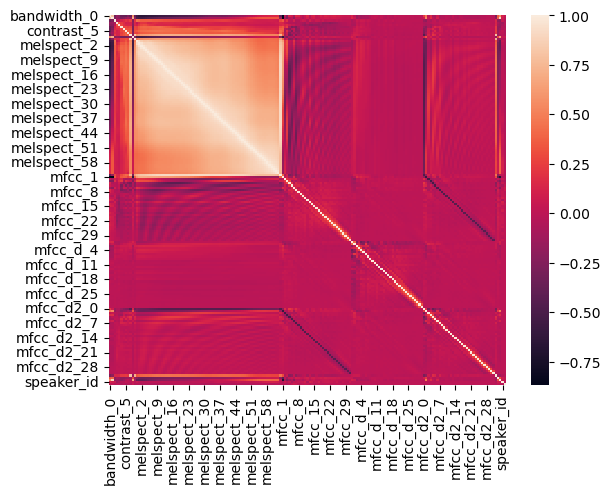

In [30]:
sns.heatmap(correlation_matrix)

In [42]:
features = df.drop('label', axis=1)

labels = df['label']

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns, index=features.index)

scaled_features_df['label'] = labels

In [61]:
stds = scaled_features_df.groupby(by='label').std()
srt = stds.apply(lambda col: col.sort_values(ascending=False).values)





In [66]:

first_feature_name = stds.columns[10]

sorted_by_first_feature = stds.sort_values(by=first_feature_name, ascending=False)

sorted_by_first_feature




bandwidth_0  centroid_0  contrast_0  contrast_1  contrast_2  \
label                                                                      
other           0.163339    0.162450    0.065858    0.086861    0.080626   
offen           0.181860    0.159846    0.070189    0.090620    0.081220   
Licht           0.134829    0.157482    0.067177    0.088315    0.083753   
nicht           0.148688    0.161441    0.067583    0.091625    0.082376   
Ofen            0.193124    0.153574    0.071313    0.093896    0.085213   
aus             0.173922    0.201242    0.068489    0.086350    0.076380   
Lüftung         0.184115    0.158843    0.072415    0.097174    0.087522   
kann            0.173623    0.137281    0.070968    0.091462    0.083425   
Fernseher       0.175580    0.175838    0.074806    0.102435    0.086470   
an              0.175042    0.135075    0.071355    0.090344    0.083274   
Haus            0.171160    0.193775    0.068636    0.087004    0.076247   
Spiegel         0.151281    0.154488    0.070800    0.095463    0.090189   
Heizung         0.163285    0.172675    0.071542    0.094093    0.082996   
Brötchen        0.170763    0.157406    0.071973    0.094825    0.086329   
Staubsauger     0.177641    0.195221    0.073866    0.095509    0.081887   
Leitung         0.169247    0.132442    0.073670    0.096325    0.084992   
warm            0.183695    0.127693    0.074396    0.093782    0.086806   
Schraube        0.176454    0.158016    0.073070    0.093753    0.081176   
Alarm           0.176711    0.126054    0.075153    0.097445    0.087966   
Radio           0.175280    0.127365    0.074500    0.096862    0.085397   
wunderbar       0.179997    0.121509    0.074513    0.103113    0.088151   

             contrast_3  contrast_4  contrast_5  contrast_6  energy_0  ...  \
label                                                                  ...   
other          0.092805    0.080502    0.077034    0.084326  0.041771  ...   
offen          0.096383    0.073833    0.072784    0.078091  0.038656  ...   
Licht          0.089458    0.073418    0.075325    0.079005  0.035067  ...   
nicht          0.090677    0.073981    0.075671    0.076340  0.032472  ...   
Ofen           0.116708    0.073511    0.077299    0.078862  0.036291  ...   
aus            0.087615    0.086809    0.083652    0.090924  0.047312  ...   
Lüftung        0.092992    0.077672    0.079252    0.075430  0.035611  ...   
kann           0.084449    0.081744    0.076497    0.081862  0.043435  ...   
Fernseher      0.108106    0.081497    0.086280    0.091865  0.050618  ...   
an             0.084394    0.085980    0.077275    0.082351  0.042592  ...   
Haus           0.086537    0.089082    0.083639    0.093080  0.047201  ...   
Spiegel        0.104738    0.083260    0.086204    0.086504  0.036473  ...   
Heizung        0.095125    0.077129    0.077444    0.082233  0.046947  ...   
Brötchen       0.098302    0.078333    0.082042    0.083207  0.042468  ...   
Staubsauger    0.095564    0.093419    0.080225    0.092754  0.053900  ...   
Leitung        0.101704    0.078054    0.081418    0.083571  0.047830  ...   
warm           0.085457    0.095375    0.080327    0.088791  0.050119  ...   
Schraube       0.097279    0.090185    0.083933    0.094077  0.050715  ...   
Alarm          0.089619    0.096410    0.085022    0.094662  0.054583  ...   
Radio          0.098039    0.087320    0.085062    0.092709  0.052511  ...   
wunderbar      0.097622    0.094874    0.088352    0.090161  0.045778  ...   

             mfcc_d2_27  mfcc_d2_28  mfcc_d2_29  mfcc_d2_30  mfcc_d2_31  \
label                                                                     
other          0.049633    0.042763    0.047365    0.043866    0.050299   
offen          0.051145    0.044345    0.048555    0.044740    0.050647   
Licht          0.049440    0.042696    0.046808    0.043111    0.049236   
nicht          0.051136    0.043879    0.047382    0.043683    0.049145   
Ofen           0.05

In [46]:
stds

bandwidth_0  centroid_0  contrast_0  contrast_1  contrast_2  \
label                                                                      
Alarm           0.176711    0.126054    0.075153    0.097445    0.087966   
Brötchen        0.170763    0.157406    0.071973    0.094825    0.086329   
Fernseher       0.175580    0.175838    0.074806    0.102435    0.086470   
Haus            0.171160    0.193775    0.068636    0.087004    0.076247   
Heizung         0.163285    0.172675    0.071542    0.094093    0.082996   
Leitung         0.169247    0.132442    0.073670    0.096325    0.084992   
Licht           0.134829    0.157482    0.067177    0.088315    0.083753   
Lüftung         0.184115    0.158843    0.072415    0.097174    0.087522   
Ofen            0.193124    0.153574    0.071313    0.093896    0.085213   
Radio           0.175280    0.127365    0.074500    0.096862    0.085397   
Schraube        0.176454    0.158016    0.073070    0.093753    0.081176   
Spiegel         0.151281    0.154488    0.070800    0.095463    0.090189   
Staubsauger     0.177641    0.195221    0.073866    0.095509    0.081887   
an              0.175042    0.135075    0.071355    0.090344    0.083274   
aus             0.173922    0.201242    0.068489    0.086350    0.076380   
kann            0.173623    0.137281    0.070968    0.091462    0.083425   
nicht           0.148688    0.161441    0.067583    0.091625    0.082376   
offen           0.181860    0.159846    0.070189    0.090620    0.081220   
other           0.163339    0.162450    0.065858    0.086861    0.080626   
warm            0.183695    0.127693    0.074396    0.093782    0.086806   
wunderbar       0.179997    0.121509    0.074513    0.103113    0.088151   

             contrast_3  contrast_4  contrast_5  contrast_6  energy_0  ...  \
label                                                                  ...   
Alarm          0.089619    0.096410    0.085022    0.094662  0.054583  ...   
Brötchen       0.098302    0.078333    0.082042    0.083207  0.042468  ...   
Fernseher      0.108106    0.081497    0.086280    0.091865  0.050618  ...   
Haus           0.086537    0.089082    0.083639    0.093080  0.047201  ...   
Heizung        0.095125    0.077129    0.077444    0.082233  0.046947  ...   
Leitung        0.101704    0.078054    0.081418    0.083571  0.047830  ...   
Licht          0.089458    0.073418    0.075325    0.079005  0.035067  ...   
Lüftung        0.092992    0.077672    0.079252    0.075430  0.035611  ...   
Ofen           0.116708    0.073511    0.077299    0.078862  0.036291  ...   
Radio          0.098039    0.087320    0.085062    0.092709  0.052511  ...   
Schraube       0.097279    0.090185    0.083933    0.094077  0.050715  ...   
Spiegel        0.104738    0.083260    0.086204    0.086504  0.036473  ...   
Staubsauger    0.095564    0.093419    0.080225    0.092754  0.053900  ...   
an             0.084394    0.085980    0.077275    0.082351  0.042592  ...   
aus            0.087615    0.086809    0.083652    0.090924  0.047312  ...   
kann           0.084449    0.081744    0.076497    0.081862  0.043435  ...   
nicht          0.090677    0.073981    0.075671    0.076340  0.032472  ...   
offen          0.096383    0.073833    0.072784    0.078091  0.038656  ...   
other          0.092805    0.080502    0.077034    0.084326  0.041771  ...   
warm           0.085457    0.095375    0.080327    0.088791  0.050119  ...   
wunderbar      0.097622    0.094874    0.088352    0.090161  0.045778  ...   

             mfcc_d2_27  mfcc_d2_28  mfcc_d2_29  mfcc_d2_30  mfcc_d2_31  \
label                                                                     
Alarm          0.053130    0.047248    0.052367    0.047504    0.054831   
Brötchen       0.053836    0.046427    0.051965    0.047156    0.054151   
Fernseher      0.057597    0.050735    0.054780    0.050372    0.057281   
Haus           0.054107    0.046809    0.051559    0.047115    0.052945   
Heizung        0.05

In [62]:
srt

bandwidth_0  centroid_0  contrast_0  contrast_1  contrast_2  \
label                                                                      
Alarm           0.193124    0.201242    0.075153    0.103113    0.090189   
Brötchen        0.184115    0.195221    0.074806    0.102435    0.088151   
Fernseher       0.183695    0.193775    0.074513    0.097445    0.087966   
Haus            0.181860    0.175838    0.074500    0.097174    0.087522   
Heizung         0.179997    0.172675    0.074396    0.096862    0.086806   
Leitung         0.177641    0.162450    0.073866    0.096325    0.086470   
Licht           0.176711    0.161441    0.073670    0.095509    0.086329   
Lüftung         0.176454    0.159846    0.073070    0.095463    0.085397   
Ofen            0.175580    0.158843    0.072415    0.094825    0.085213   
Radio           0.175280    0.158016    0.071973    0.094093    0.084992   
Schraube        0.175042    0.157482    0.071542    0.093896    0.083753   
Spiegel         0.173922    0.157406    0.071355    0.093782    0.083425   
Staubsauger     0.173623    0.154488    0.071313    0.093753    0.083274   
an              0.171160    0.153574    0.070968    0.091625    0.082996   
aus             0.170763    0.137281    0.070800    0.091462    0.082376   
kann            0.169247    0.135075    0.070189    0.090620    0.081887   
nicht           0.163339    0.132442    0.068636    0.090344    0.081220   
offen           0.163285    0.127693    0.068489    0.088315    0.081176   
other           0.151281    0.127365    0.067583    0.087004    0.080626   
warm            0.148688    0.126054    0.067177    0.086861    0.076380   
wunderbar       0.134829    0.121509    0.065858    0.086350    0.076247   

             contrast_3  contrast_4  contrast_5  contrast_6  energy_0  ...  \
label                                                                  ...   
Alarm          0.116708    0.096410    0.088352    0.094662  0.054583  ...   
Brötchen       0.108106    0.095375    0.086280    0.094077  0.053900  ...   
Fernseher      0.104738    0.094874    0.086204    0.093080  0.052511  ...   
Haus           0.101704    0.093419    0.085062    0.092754  0.050715  ...   
Heizung        0.098302    0.090185    0.085022    0.092709  0.050618  ...   
Leitung        0.098039    0.089082    0.083933    0.091865  0.050119  ...   
Licht          0.097622    0.087320    0.083652    0.090924  0.047830  ...   
Lüftung        0.097279    0.086809    0.083639    0.090161  0.047312  ...   
Ofen           0.096383    0.085980    0.082042    0.088791  0.047201  ...   
Radio          0.095564    0.083260    0.081418    0.086504  0.046947  ...   
Schraube       0.095125    0.081744    0.080327    0.084326  0.045778  ...   
Spiegel        0.092992    0.081497    0.080225    0.083571  0.043435  ...   
Staubsauger    0.092805    0.080502    0.079252    0.083207  0.042592  ...   
an             0.090677    0.078333    0.077444    0.082351  0.042468  ...   
aus            0.089619    0.078054    0.077299    0.082233  0.041771  ...   
kann           0.089458    0.077672    0.077275    0.081862  0.038656  ...   
nicht          0.087615    0.077129    0.077034    0.079005  0.036473  ...   
offen          0.086537    0.073981    0.076497    0.078862  0.036291  ...   
other          0.085457    0.073833    0.075671    0.078091  0.035611  ...   
warm           0.084449    0.073511    0.075325    0.076340  0.035067  ...   
wunderbar      0.084394    0.073418    0.072784    0.075430  0.032472  ...   

             mfcc_d2_27  mfcc_d2_28  mfcc_d2_29  mfcc_d2_30  mfcc_d2_31  \
label                                                                     
Alarm          0.058090    0.050735    0.056210    0.050372    0.057855   
Brötchen       0.057909    0.050733    0.054780    0.050247    0.057435   
Fernseher      0.057597    0.050493    0.054701    0.050098    0.057281   
Haus           0.055355    0.048491    0.053474    0.048987    0.056127   
Heizung        0.05

In [47]:
stds.describe()

bandwidth_0  centroid_0  contrast_0  contrast_1  contrast_2  \
count    21.000000   21.000000   21.000000   21.000000   21.000000   
mean      0.171411    0.155701    0.071537    0.093679    0.083924   
std       0.013251    0.023284    0.002741    0.004585    0.003617   
min       0.134829    0.121509    0.065858    0.086350    0.076247   
25%       0.169247    0.135075    0.070189    0.090620    0.081887   
50%       0.175042    0.157482    0.071542    0.093896    0.083753   
75%       0.177641    0.162450    0.073866    0.096325    0.086470   
max       0.193124    0.201242    0.075153    0.103113    0.090189   

       contrast_3  contrast_4  contrast_5  contrast_6   energy_0  ...  \
count   21.000000   21.000000   21.000000   21.000000  21.000000  ...   
mean     0.094932    0.083447    0.080702    0.085753   0.044398  ...   
std      0.008202    0.007666    0.004314    0.006294   0.006673  ...   
min      0.084394    0.073418    0.072784    0.075430   0.032472  ...   
25%      0.089458    0.077672    0.077275    0.081862   0.038656  ...   
50%      0.095125    0.081744    0.080327    0.084326   0.045778  ...   
75%      0.098039    0.089082    0.083933    0.091865   0.050119  ...   
max      0.116708    0.096410    0.088352    0.094662   0.054583  ...   

       mfcc_d2_27  mfcc_d2_28  mfcc_d2_29  mfcc_d2_30  mfcc_d2_31    power_0  \
count   21.000000   21.000000   21.000000   21.000000   21.000000  21.000000   
mean     0.053384    0.046319    0.050783    0.046680    0.053276   0.006916   
std      0.002686    0.002525    0.002717    0.002261    0.002697   0.001106   
min      0.048932    0.042595    0.046808    0.043111    0.049145   0.004896   
25%      0.051145    0.044345    0.048555    0.044740    0.050647   0.005981   
50%      0.053473    0.046427    0.050614    0.047115    0.053141   0.007036   
75%      0.054972    0.047415    0.052363    0.048051    0.054831   0.007426   
max      0.058090    0.050735    0.056210    0.050372    0.057855   0.009417   

           yin_0      zcr_0  speaker_id  encoded_label  
count  21.000000  21.000000   20.000000           21.0  
mean    0.290732   0.143122    0.290547            0.0  
std     0.031119   0.036693    0.015446            0.0  
min     0.239142   0.089556    0.262049            0.0  
25%     0.262694   0.107645    0.282537            0.0  
50%     0.288683   0.144916    0.286758            0.0  
75%     0.320640   0.165232    0.295890            0.0  
max     0.339234   0.213902    0.333200            0.0  

[8 rows x 177 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


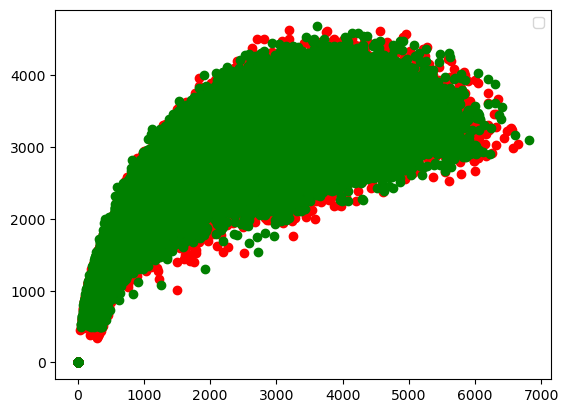

In [68]:
plt.scatter(df[df['label'] == 'nicht']['centroid_0'], df[df['label'] == 'nicht']['bandwidth_0'], c='red')
plt.scatter(df[df['label'] == 'Licht']['centroid_0'], df[df['label'] == 'Licht']['bandwidth_0'], c='green')
plt.legend()

In [54]:
overall_variability = stds.mean().sort_values(ascending=False)
overall_variability


yin_0            0.290732
speaker_id       0.290547
melspect_2       0.200439
melspect_8       0.194817
melspect_7       0.194034
                   ...   
energy_0         0.044398
mfcc_d2_8        0.042198
flux_0           0.027194
power_0          0.006916
encoded_label    0.000000
Length: 177, dtype: float64

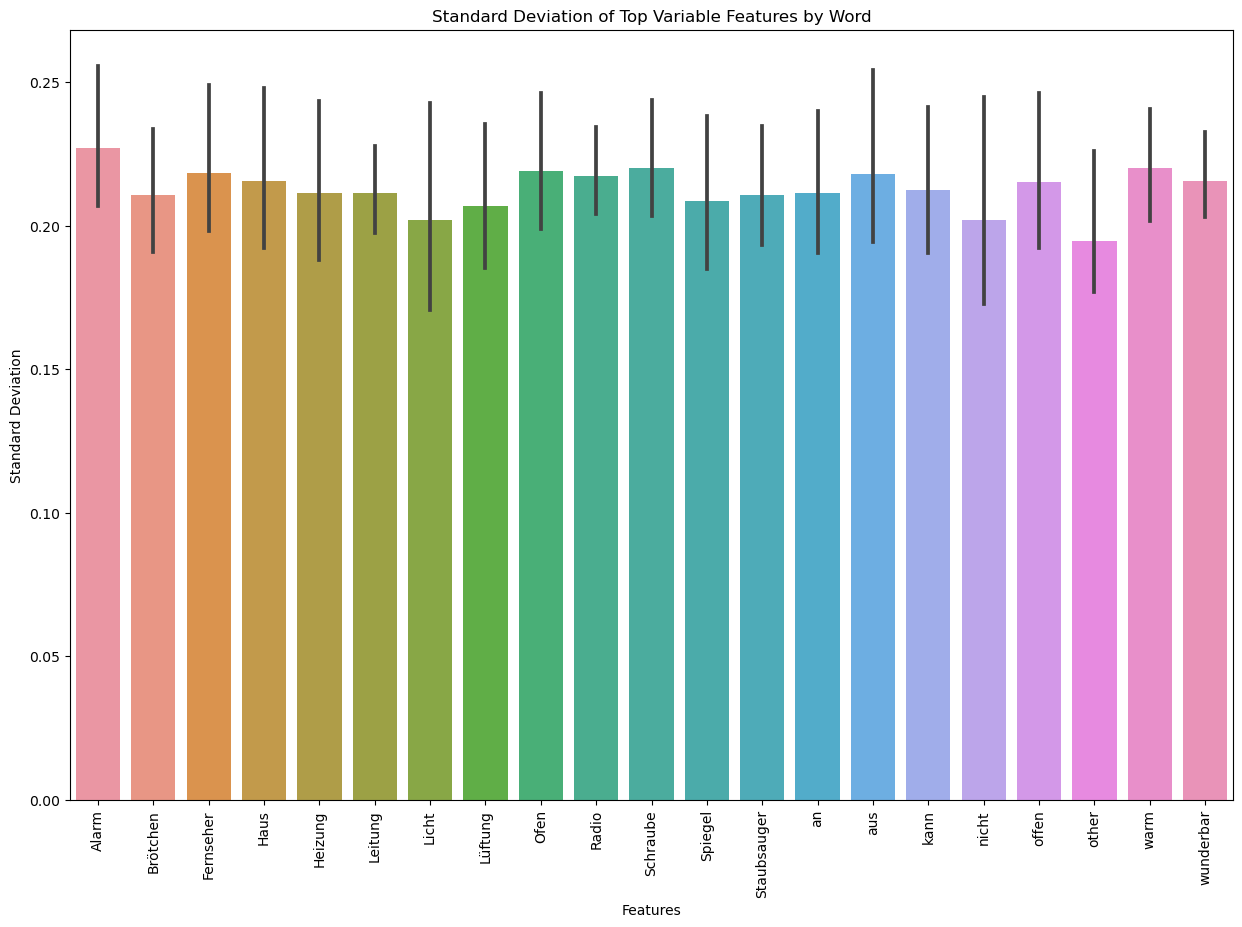

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize the standard deviations for the top N most variable features
top_n_features = 10
top_variable_features = overall_variability.head(top_n_features).index

plt.figure(figsize=(15, 10))
sns.barplot(data=stds[top_variable_features].T)
plt.xticks(rotation=90)
plt.title('Standard Deviation of Top Variable Features by Word')
plt.ylabel('Standard Deviation')
plt.xlabel('Features')
plt.show()


In [ ]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(df['label'])

In [ ]:
# Create a new DataFrame that includes the encoded labels for correlation analysis
df_with_encoded_labels = df.copy()
df_with_encoded_labels['encoded_label'] = encoded_labels


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_with_encoded_labels.corr()

# Select correlations between features and the encoded labels
correlations_with_labels = correlation_matrix.loc[df.columns[:-1], 'encoded_label']


In [ ]:
# Sort the features based on the absolute correlation values
sorted_correlations = correlations_with_labels.abs().sort_values(ascending=False)

# Print out the sorted correlations
print(sorted_correlations)


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA requires formula strings, e.g., 'feature ~ C(label)'
# Loop over each feature and perform ANOVA
anova_results = {}
for feature in df.columns[:-1]:  # Exclude the label column
    model = ols(f'{feature} ~ C(label)', data=df).fit()
    anova_result = sm.stats.anova_lm(model, typ=2)
    anova_results[feature] = anova_result.iloc[0]['PR(>F)']  # Store the p-value

# Print sorted p-values
sorted_p_values = {k: v for k, v in sorted(anova_results.items(), key=lambda item: item[1])}
print(sorted_p_values)


In [ ]:
label_correlations

## Ploting RF classifier

In [15]:

# # plt.bar(range(len(feature_importances)), feature_importances)
# # plt.xlabel('Feature Index')
# # plt.ylabel('Importance')
# # plt.title('Feature Importances')
# # plt.show()

# # Initialize PCA, let's start with 50 components
# pca = PCA(n_components=50)
# X_pca = pca.fit_transform(X_scaled)

# # Check the explained variance ratio
# print(pca.explained_variance_ratio_)
# print(f"Total variance explained by 50 components: {sum(pca.explained_variance_ratio_)}")



In [16]:
# # Convert the PCA-transformed data back to a DataFrame
# X_pca_df = pd.DataFrame(X_pca)

# # Attach labels
# X_pca_df['label'] = labels

# # Splitting the data
# from sklearn.model_selection import train_test_split

# X = X_pca_df.drop('label', axis=1)
# y = X_pca_df['label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


## Correlation matrix between every feature

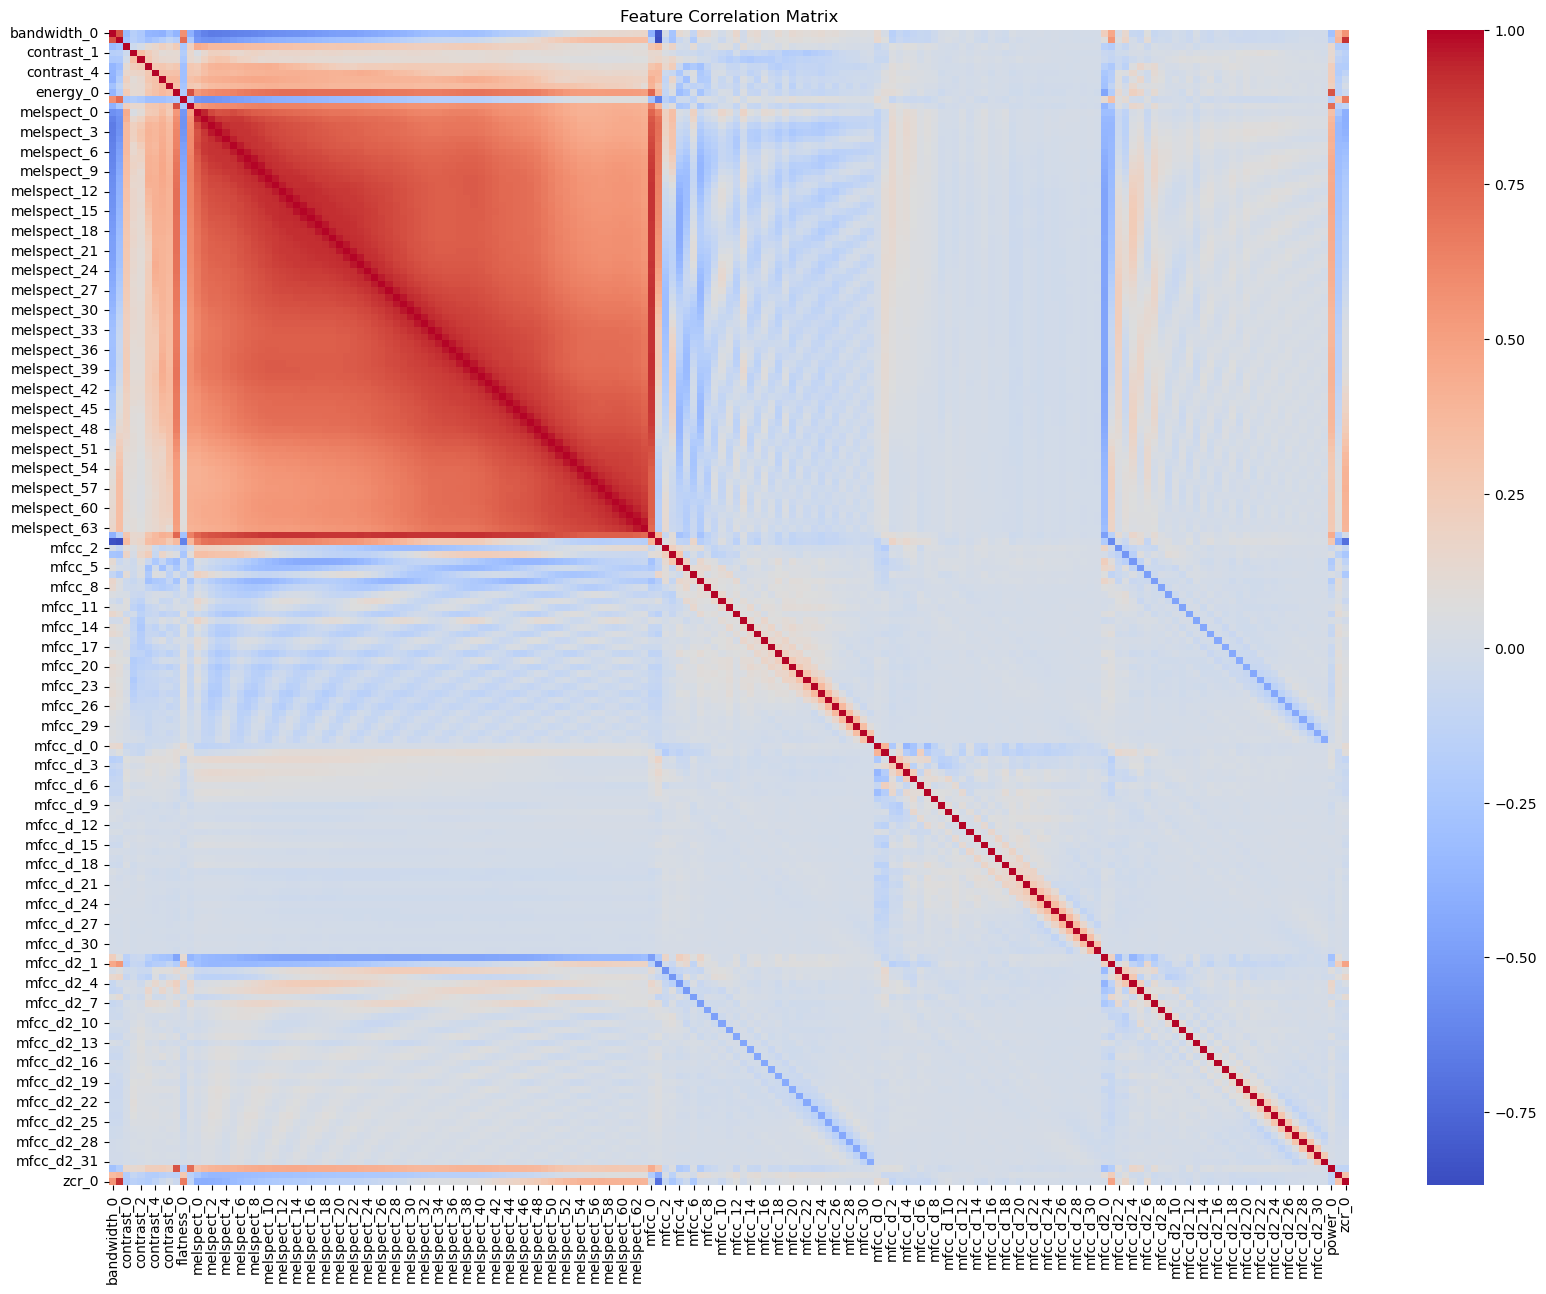

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".1f")
plt.title('Feature Correlation Matrix')
plt.show()


In [24]:
srt = correlation_matrix.sort_values
srt

<bound method DataFrame.sort_values of              bandwidth_0  centroid_0  contrast_0  contrast_1  contrast_2  \
bandwidth_0     1.000000    0.808640   -0.330373   -0.173629   -0.223954   
centroid_0      0.808640    1.000000   -0.274361   -0.167068   -0.216947   
contrast_0     -0.330373   -0.274361    1.000000   -0.045833    0.005218   
contrast_1     -0.173629   -0.167068   -0.045833    1.000000    0.338781   
contrast_2     -0.223954   -0.216947    0.005218    0.338781    1.000000   
...                  ...         ...         ...         ...         ...   
mfcc_d2_30     -0.020752   -0.015386   -0.002169    0.006434    0.008360   
mfcc_d2_31     -0.015733   -0.014788   -0.005126   -0.010837    0.003165   
power_0        -0.279574   -0.191880    0.145673    0.126806    0.141479   
yin_0           0.355347    0.387063   -0.194122   -0.093689   -0.131248   
zcr_0           0.561199    0.908128   -0.198719   -0.149525   -0.173403   

             contrast_3  contrast_4  contrast_5 

In [ ]:
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.describe().T

In [19]:
# feature_to_visualize = 0  

# df['speaker_id'] = development['speaker_id']


# plt.figure(figsize=(10, 8))
# sns.boxplot(x='speaker_id', y=feature_to_visualize, data=df)
# plt.title(f'Feature {feature_to_visualize} Distribution by Speaker')
# plt.xlabel('Speaker ID')
# plt.ylabel('Feature Value')
# plt.xticks(rotation=45) 
# plt.show()


AttributeError: 'bool' object has no attribute 'all'

<Figure size 1000x800 with 0 Axes>

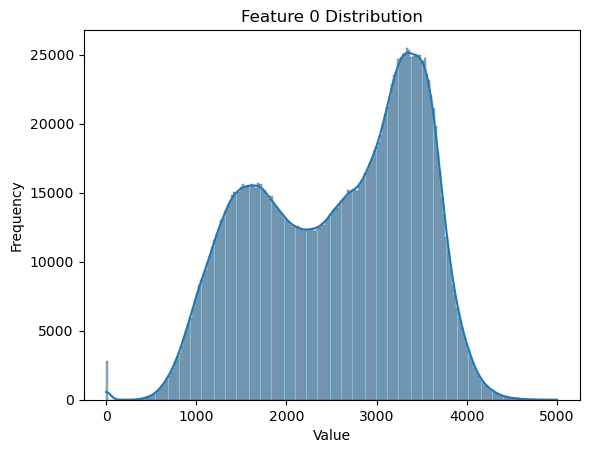

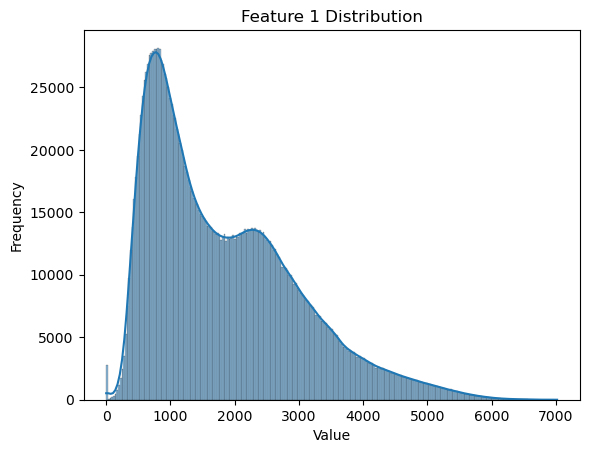

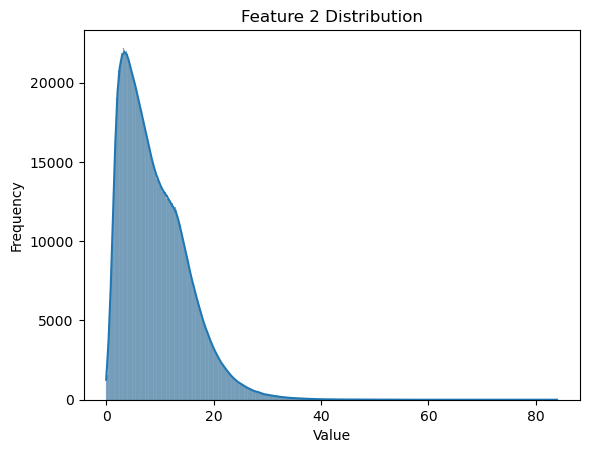

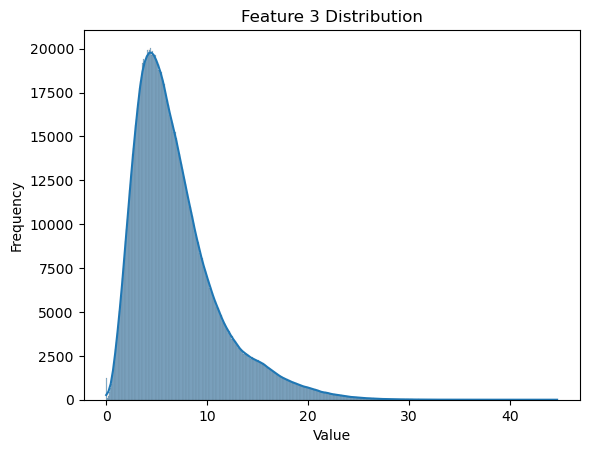

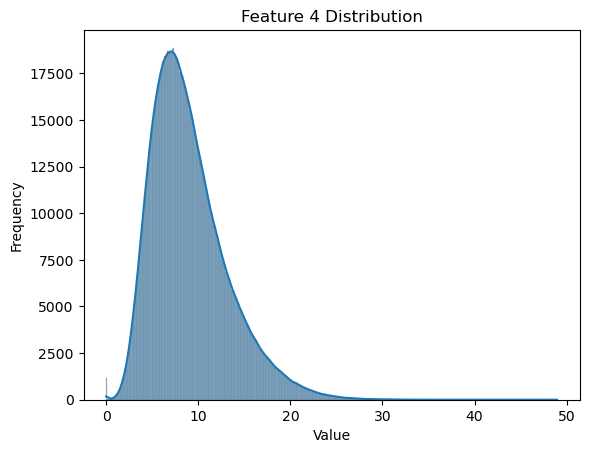

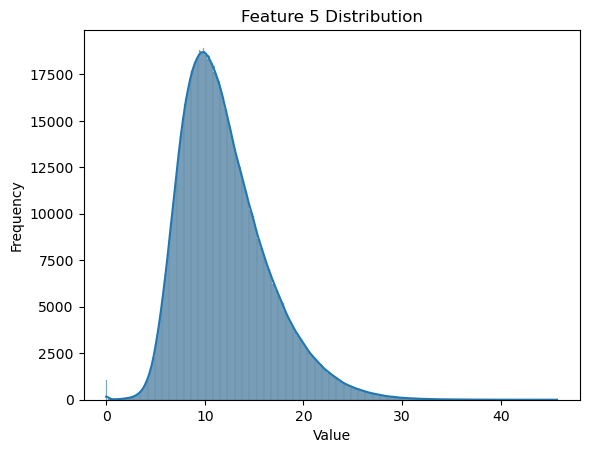

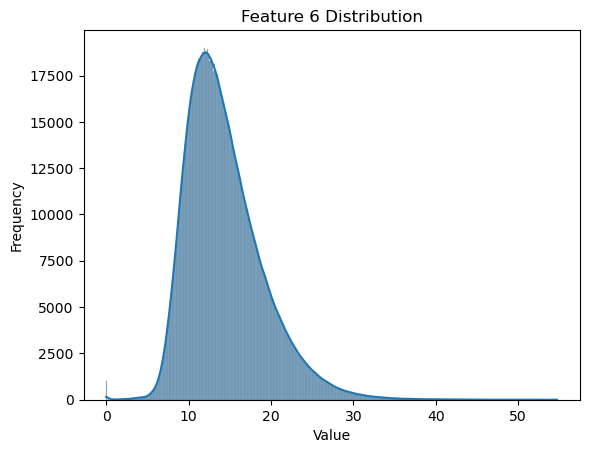

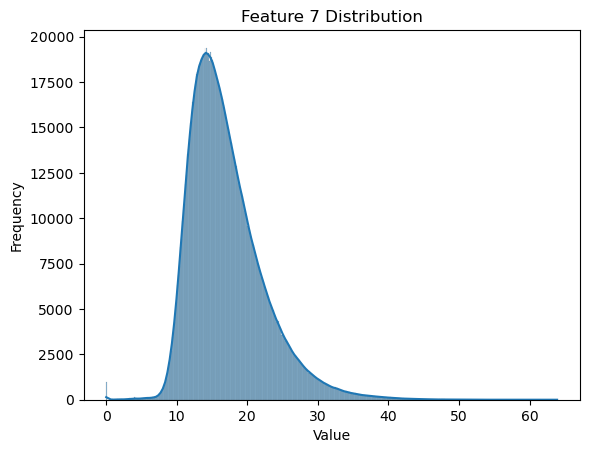

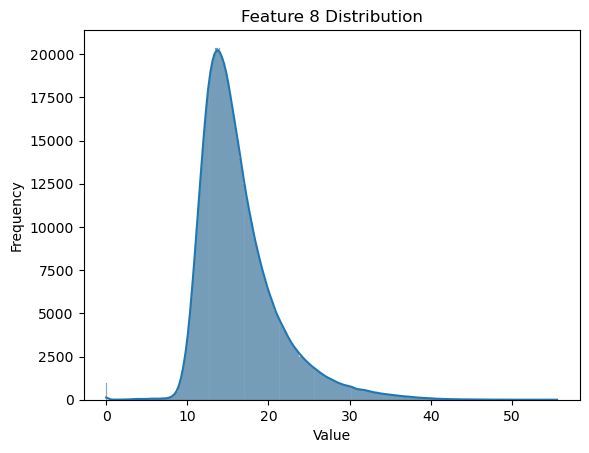

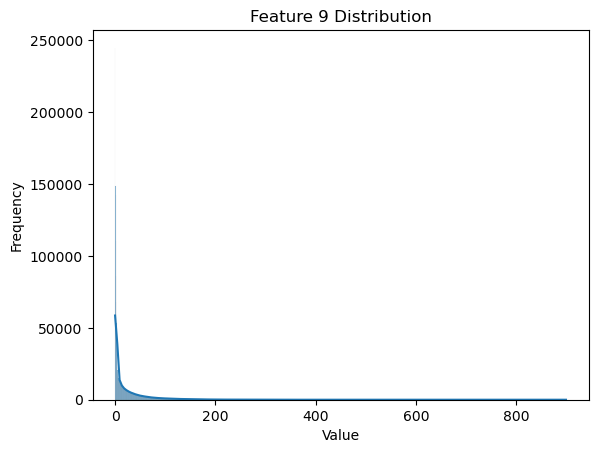

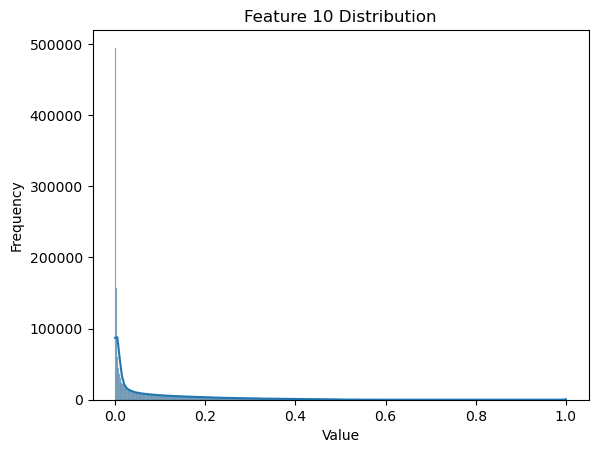

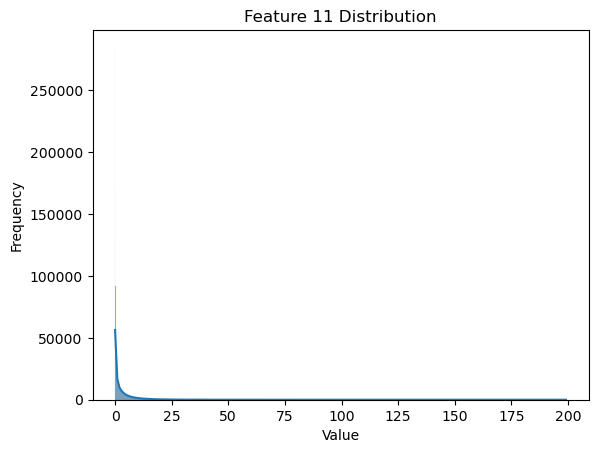

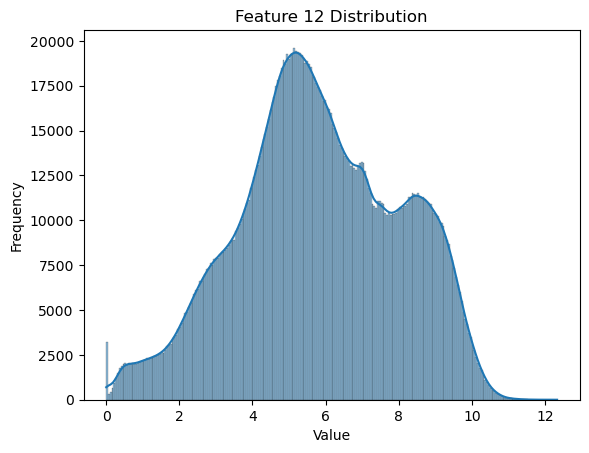

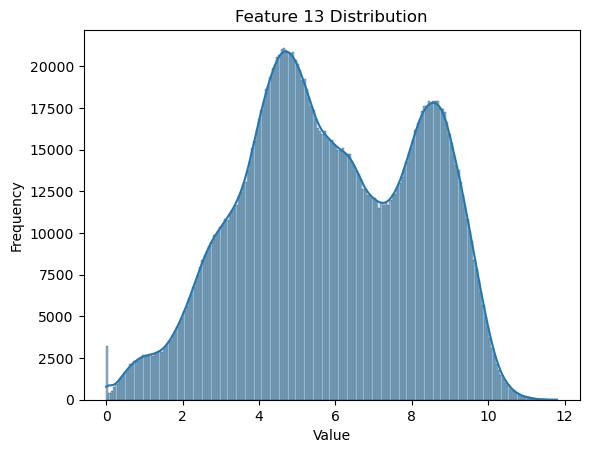

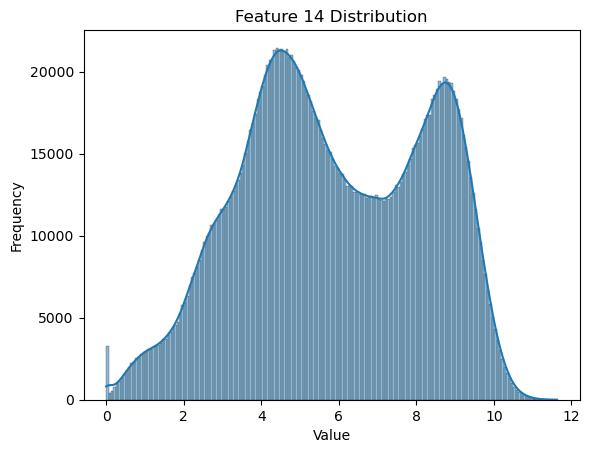

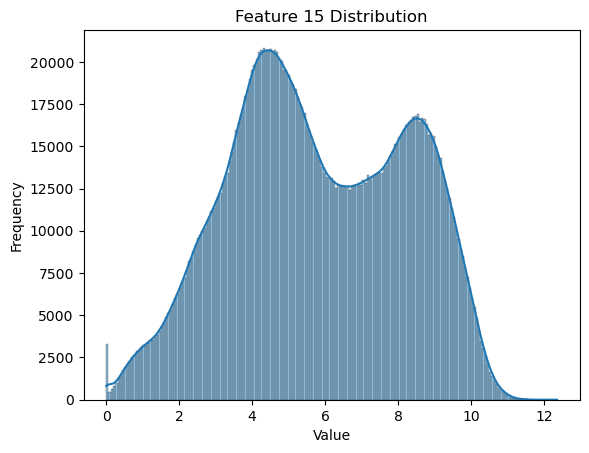

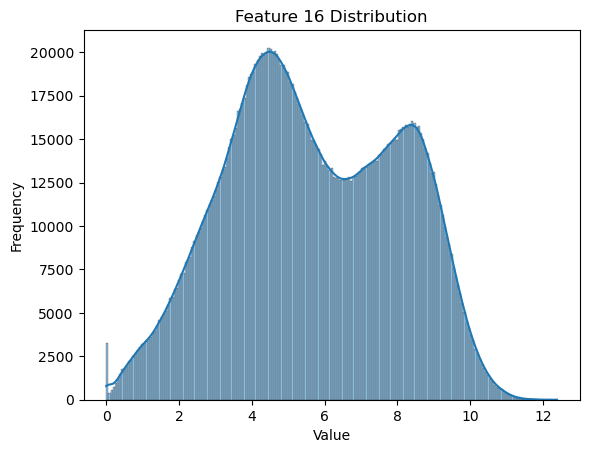

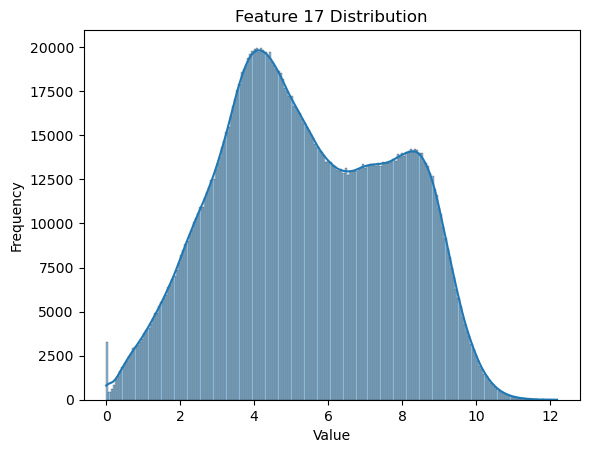

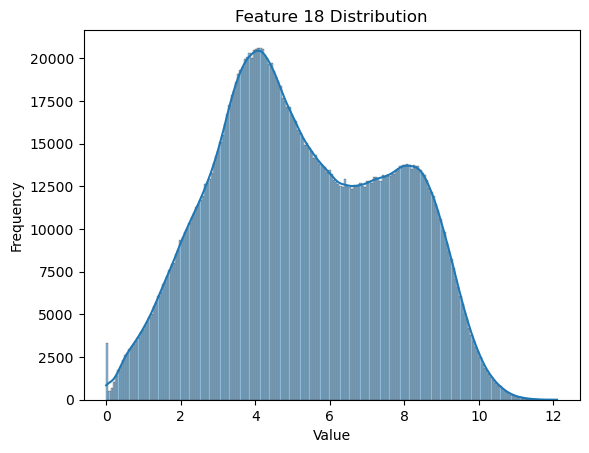

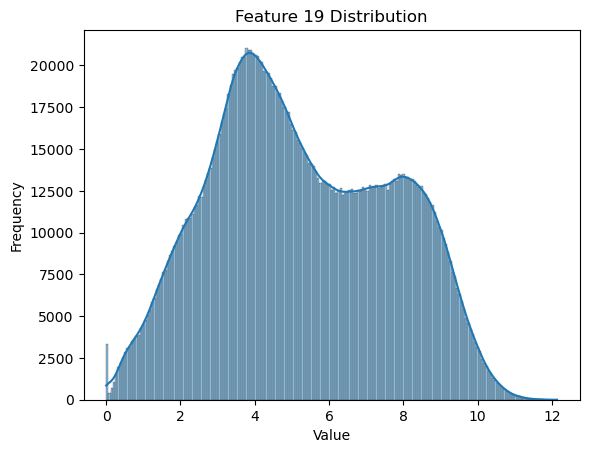

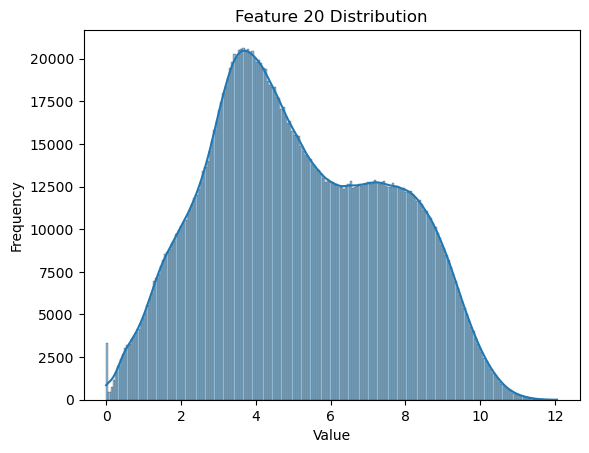

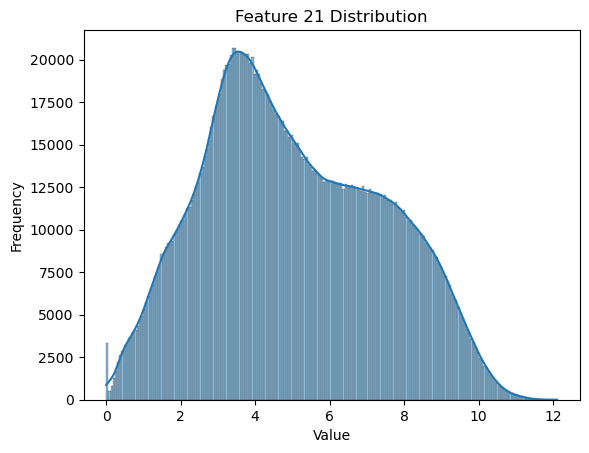

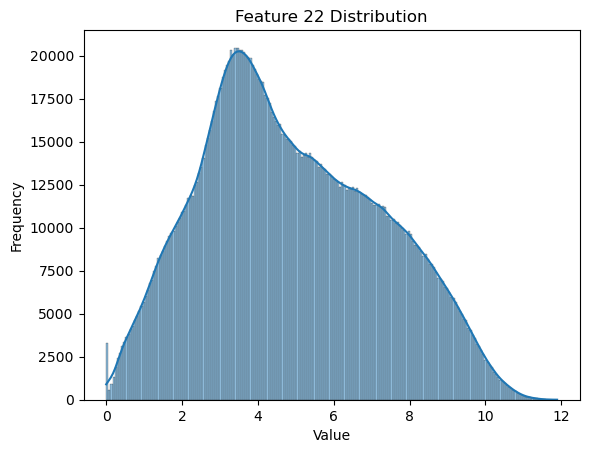

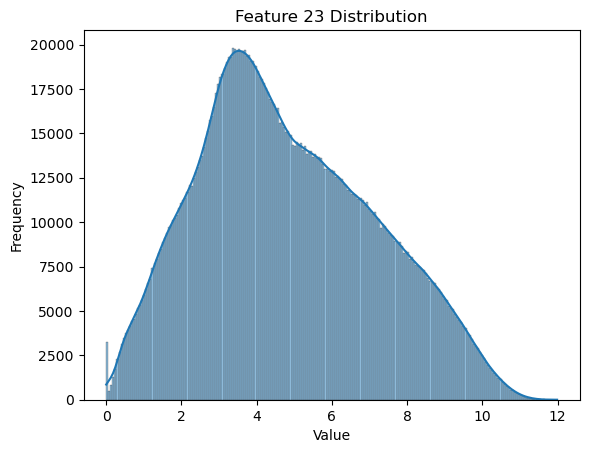

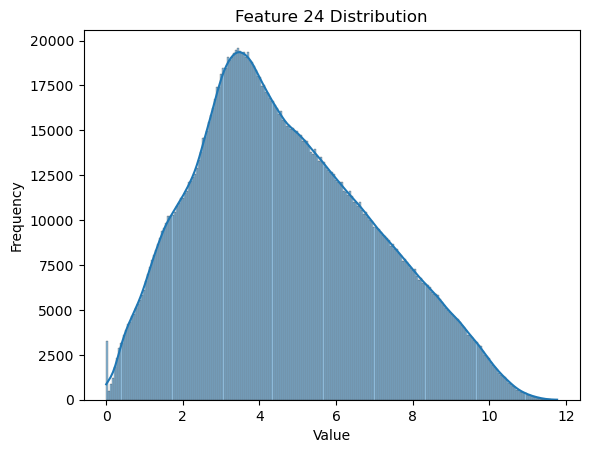

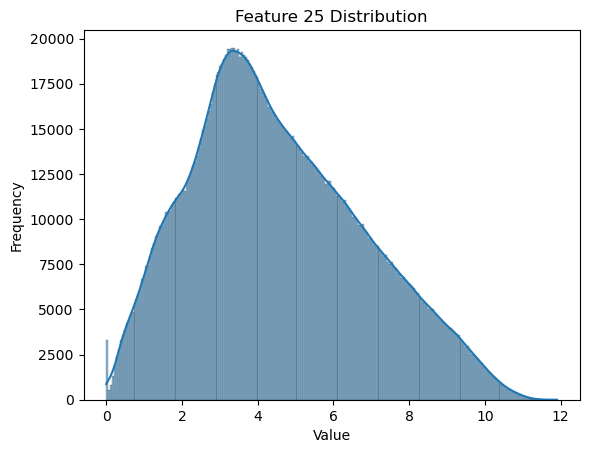

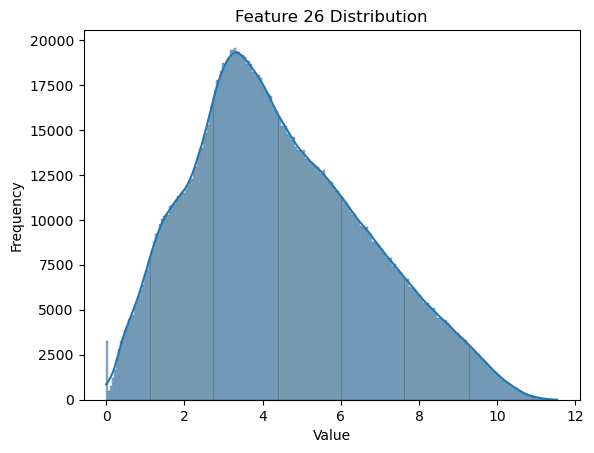

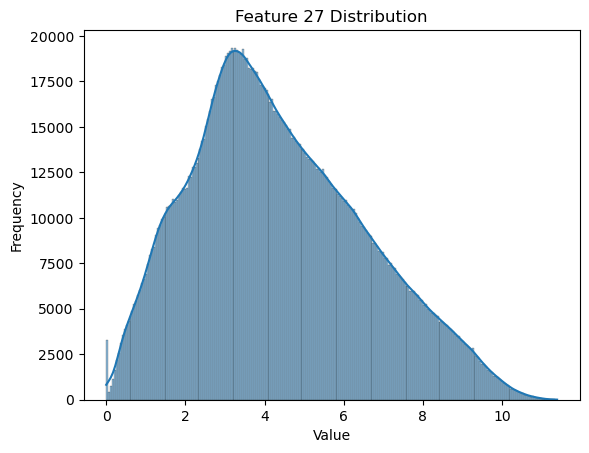

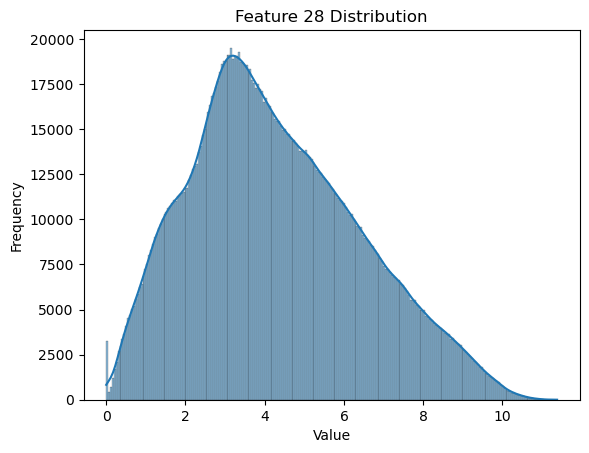

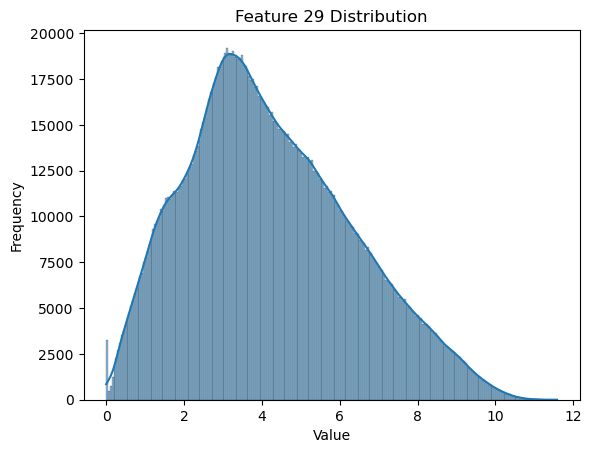

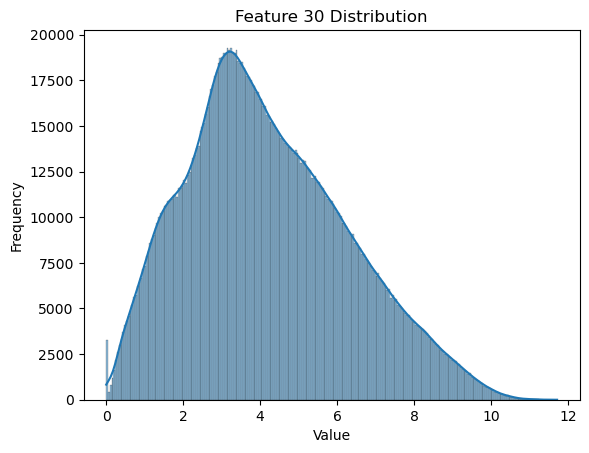

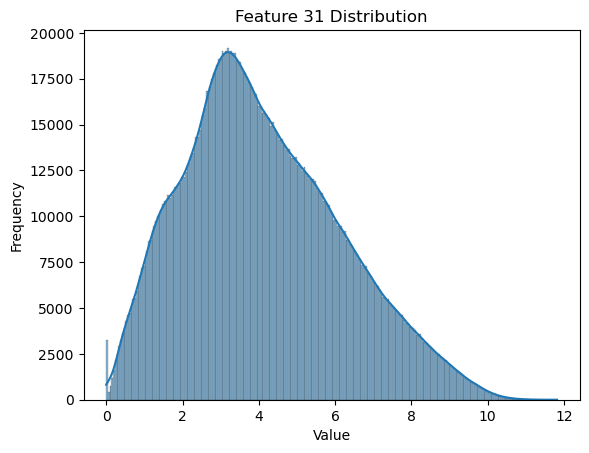

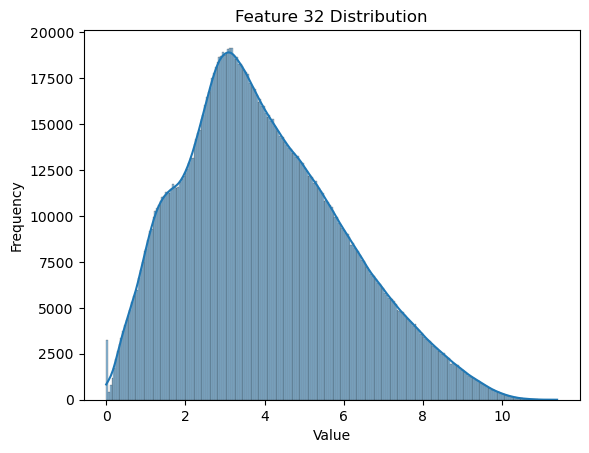

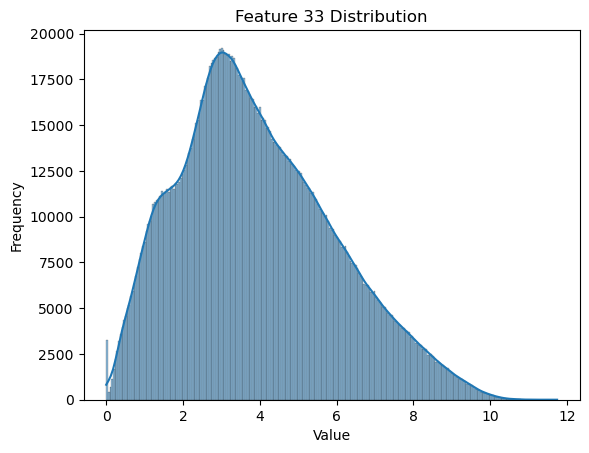

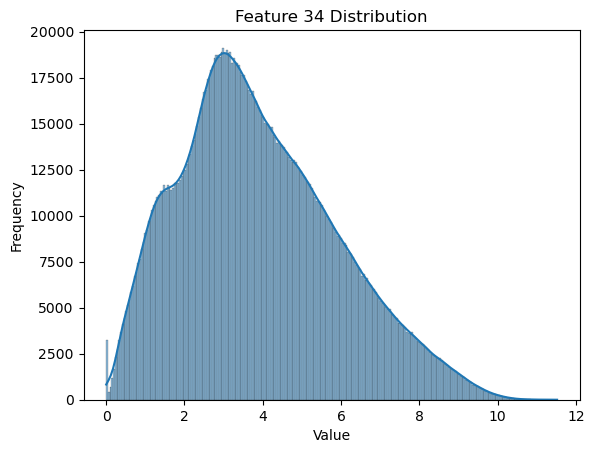

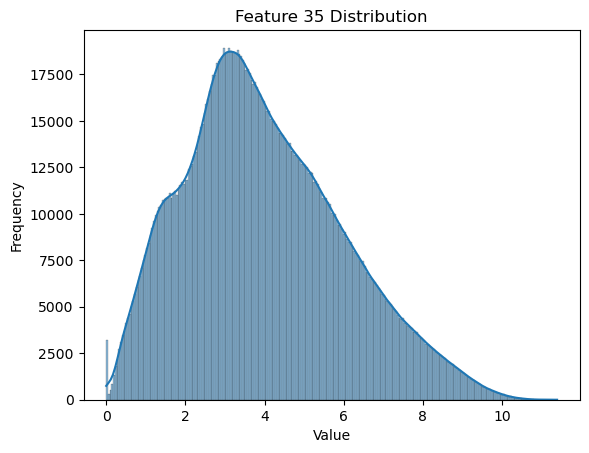

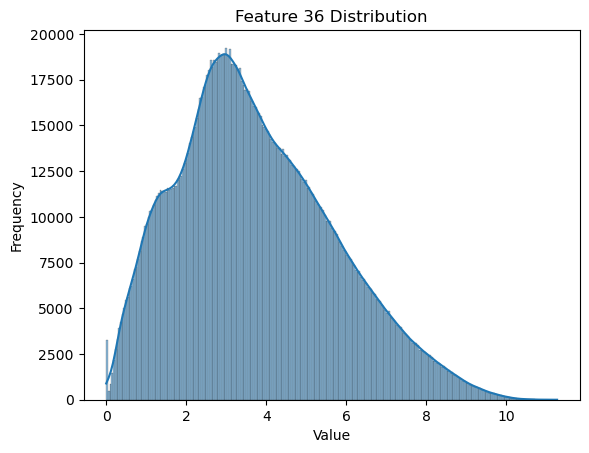

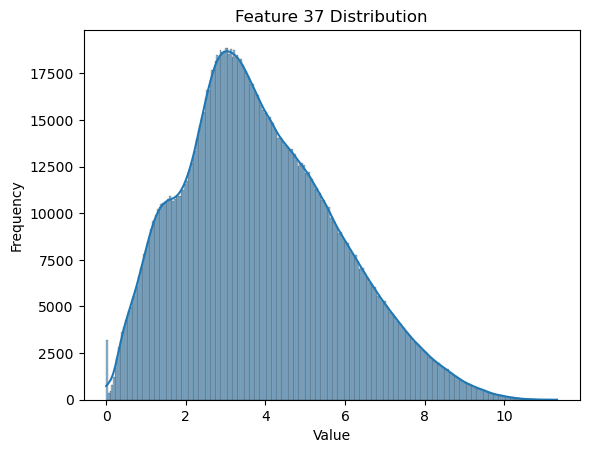

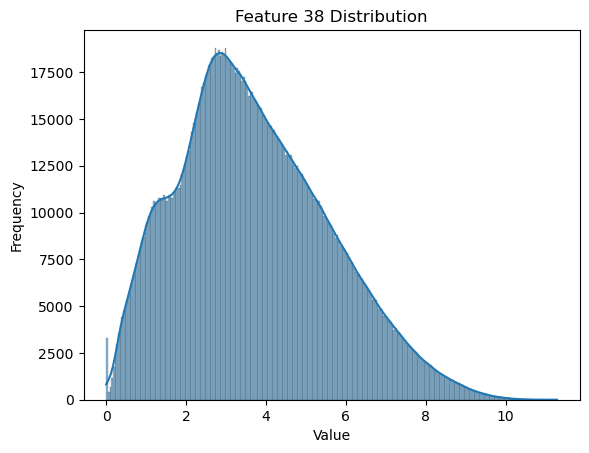

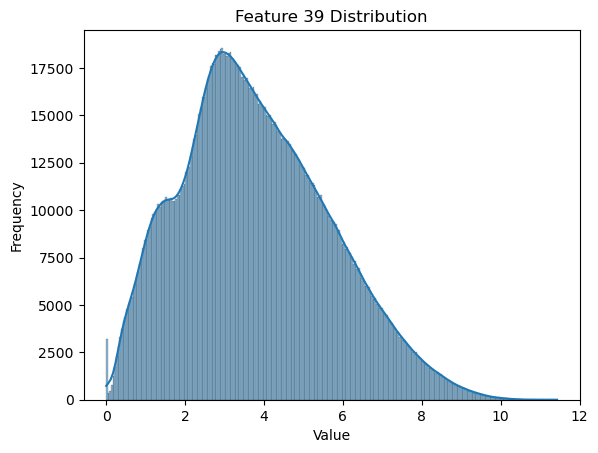

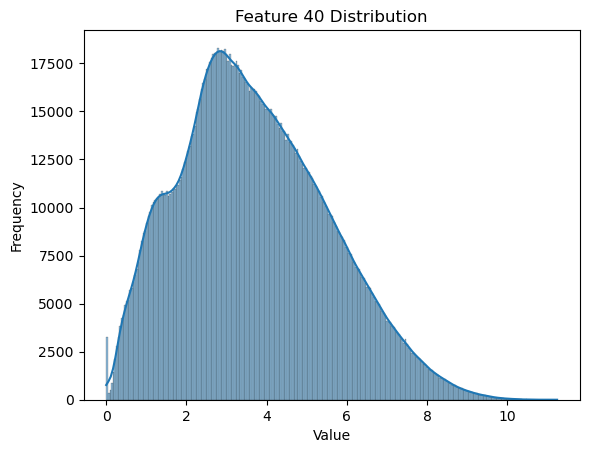

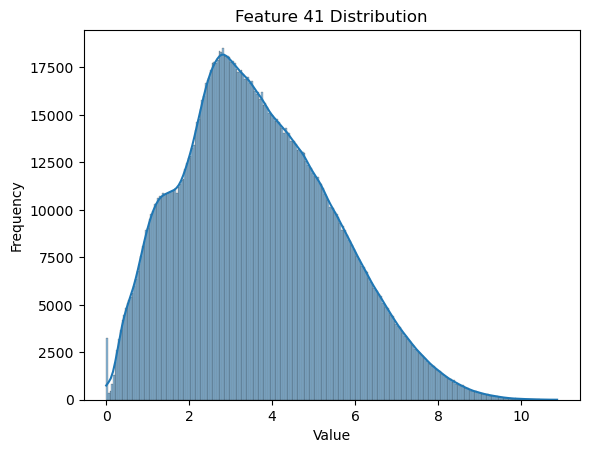

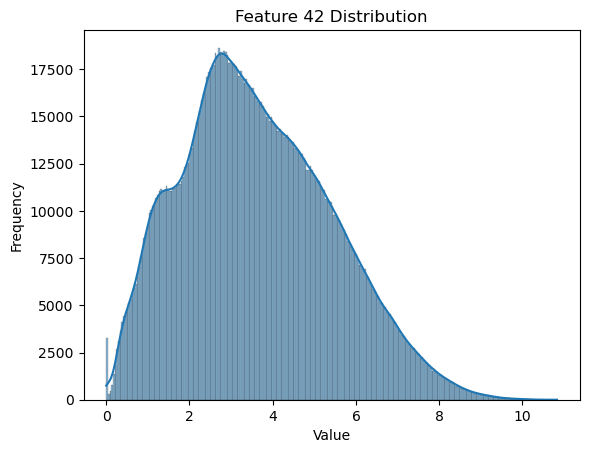

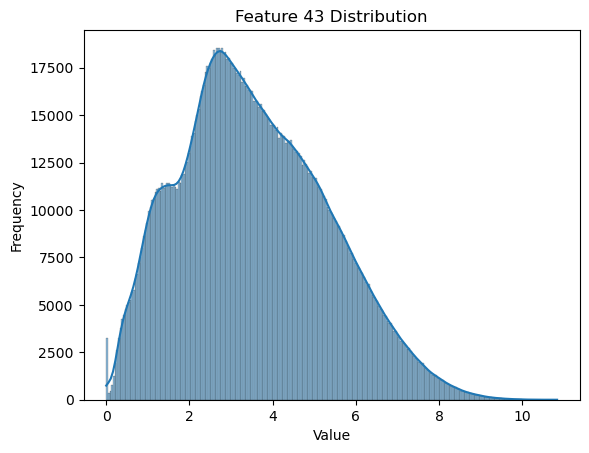

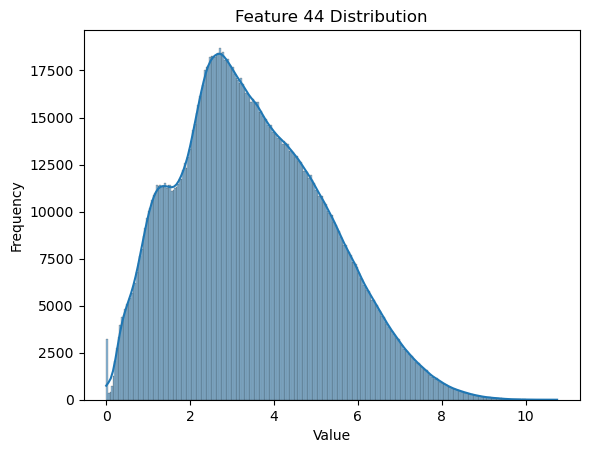

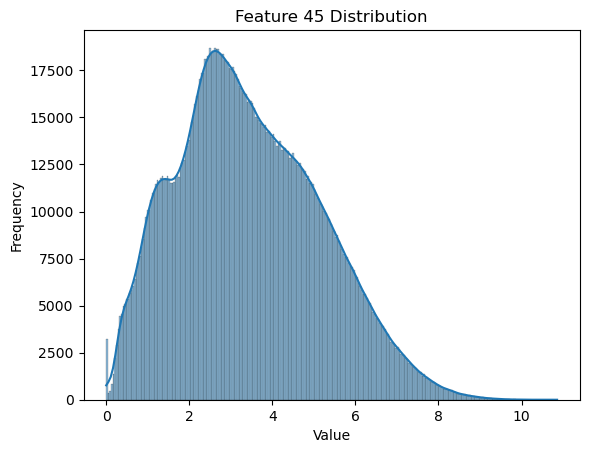

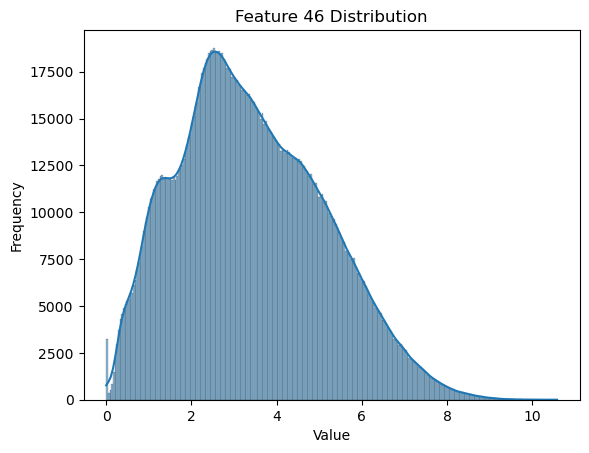

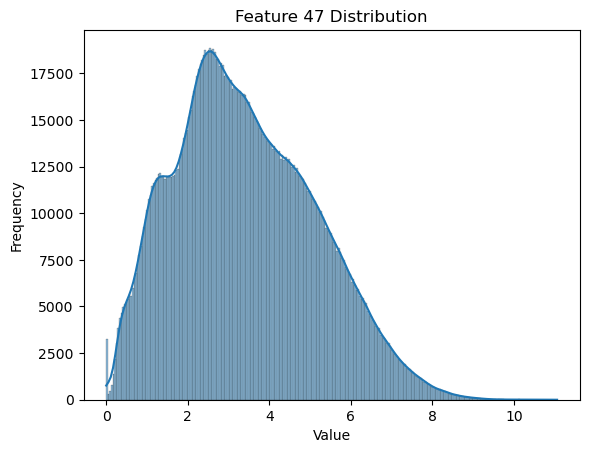

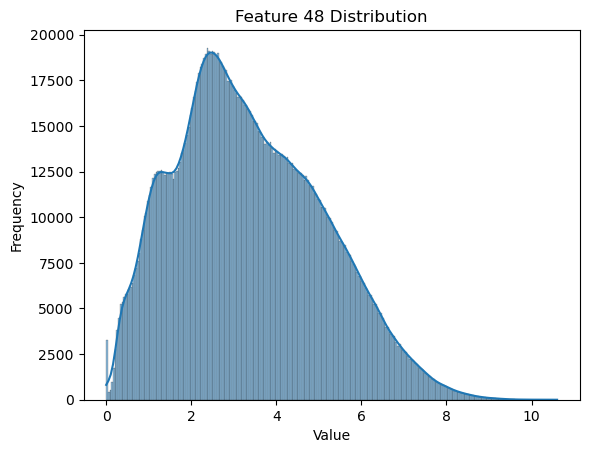

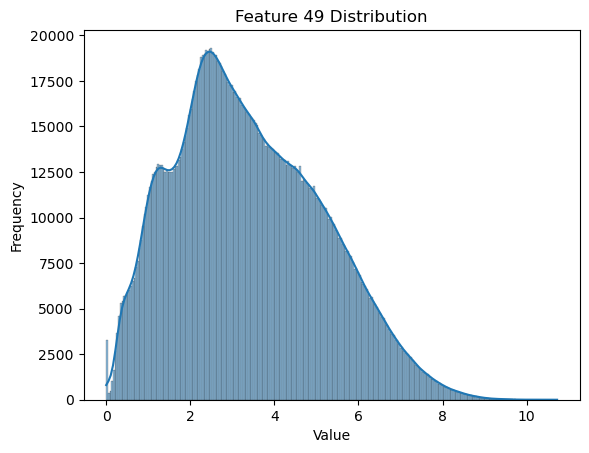

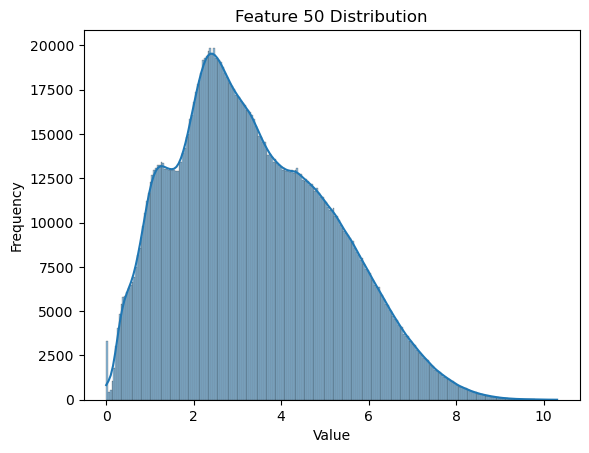

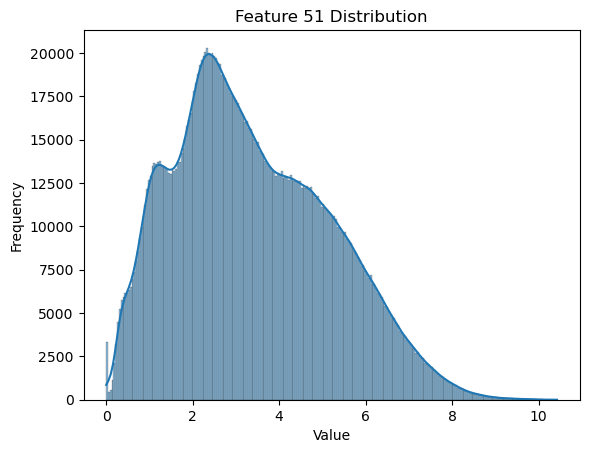

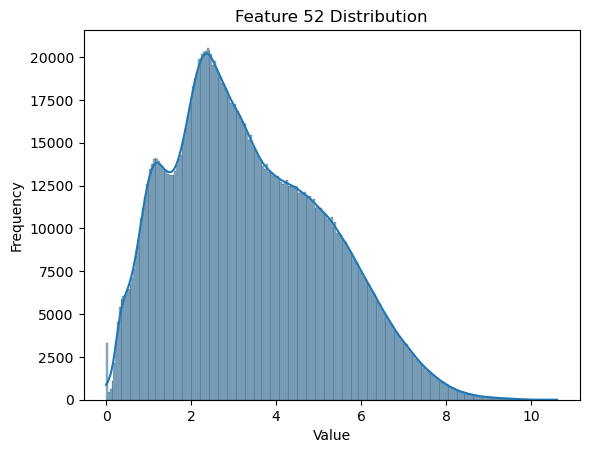

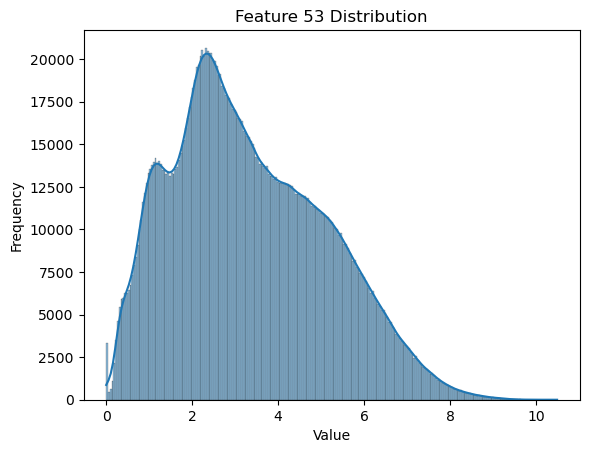

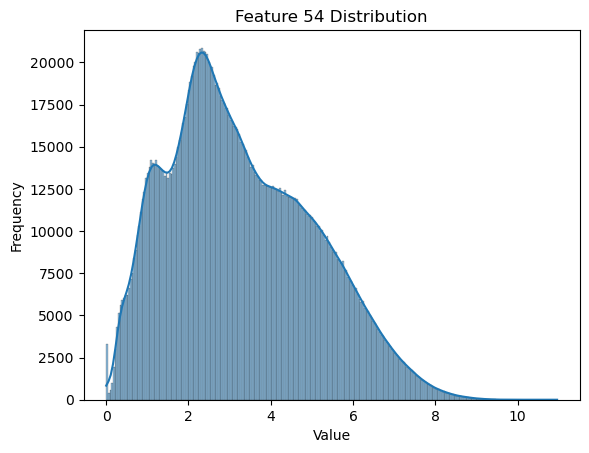

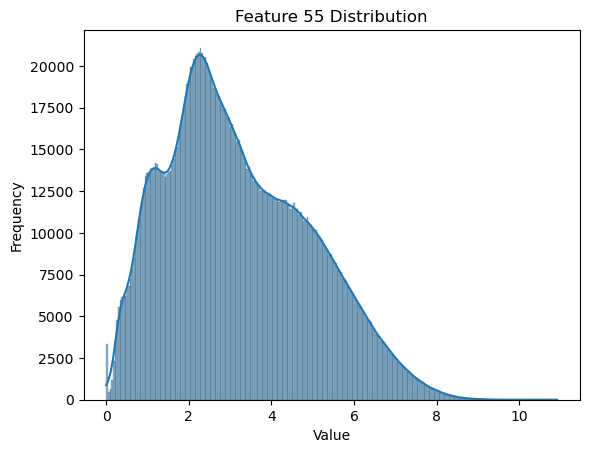

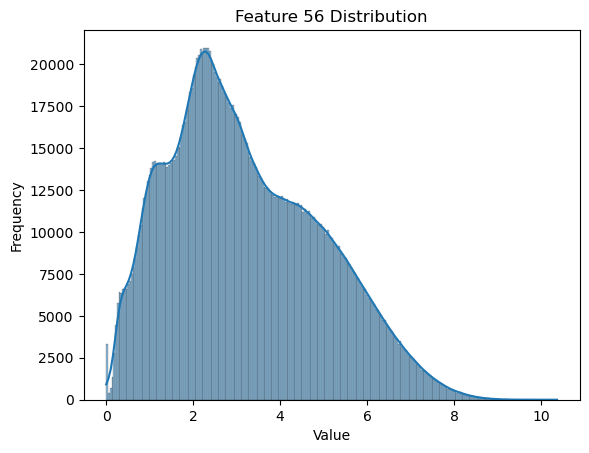

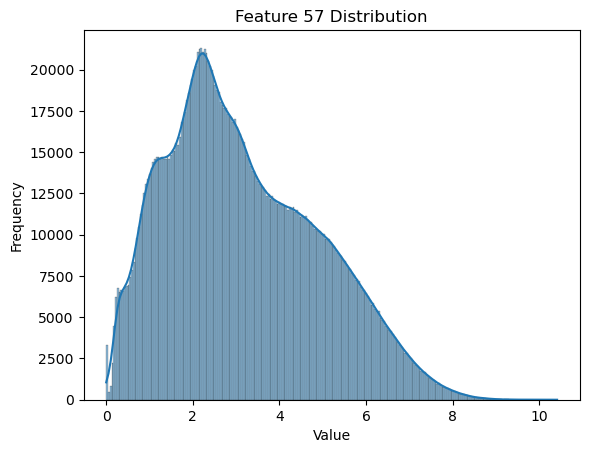

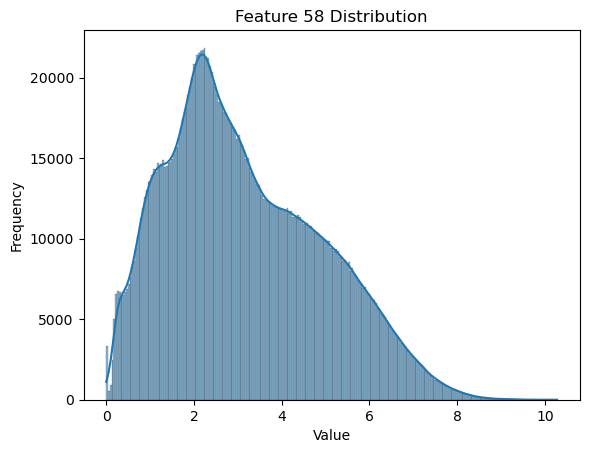

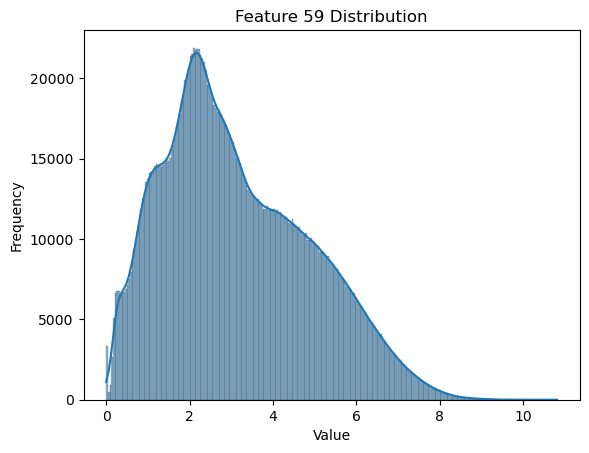

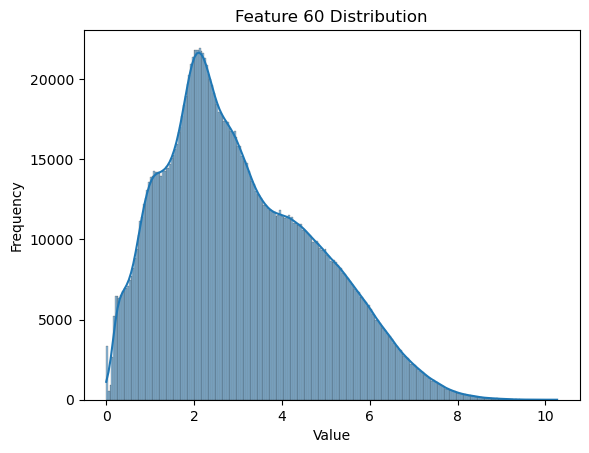

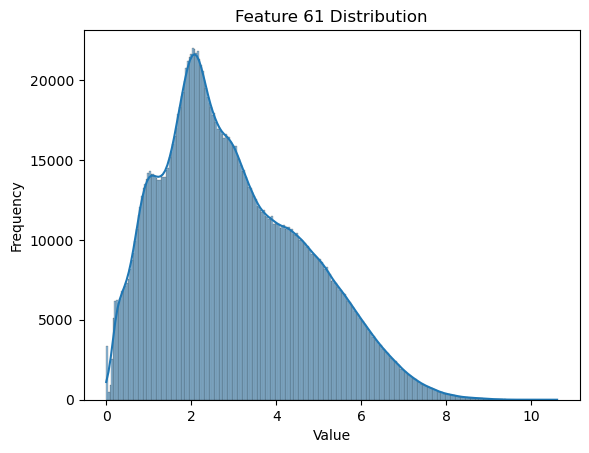

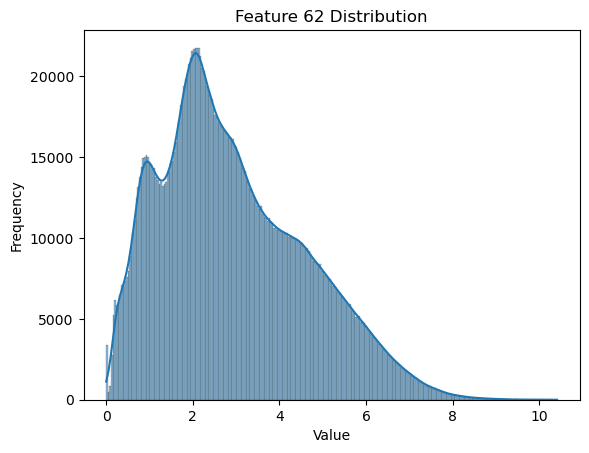

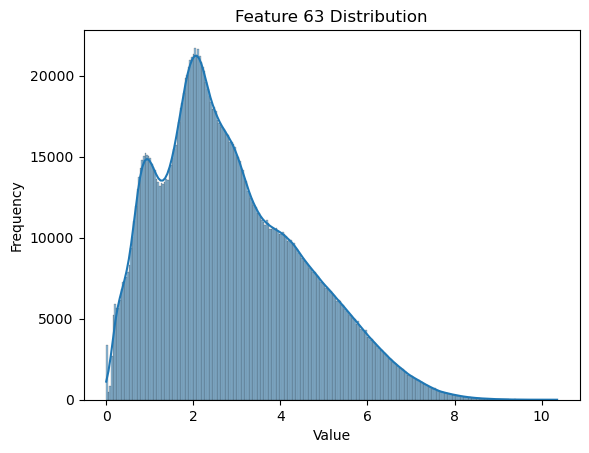

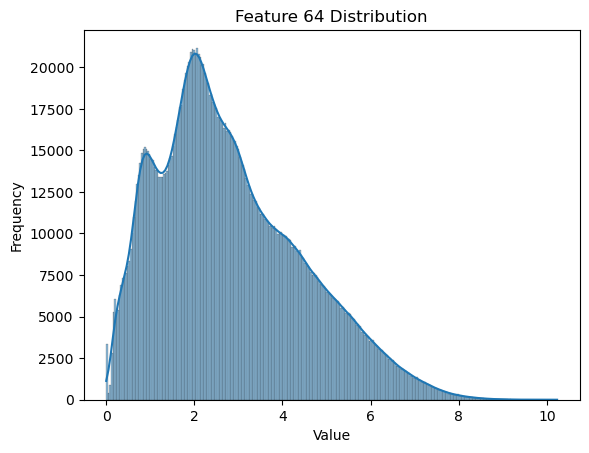

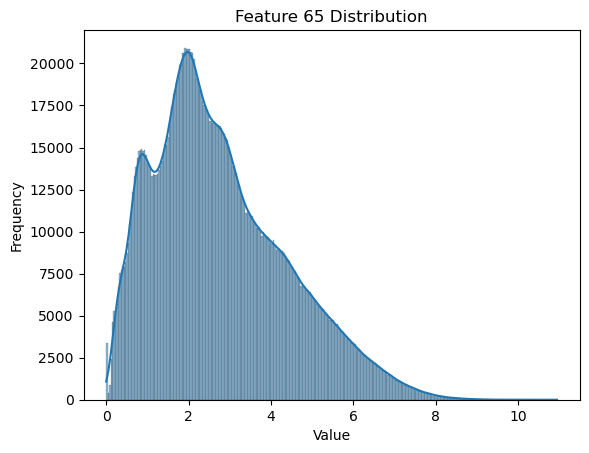

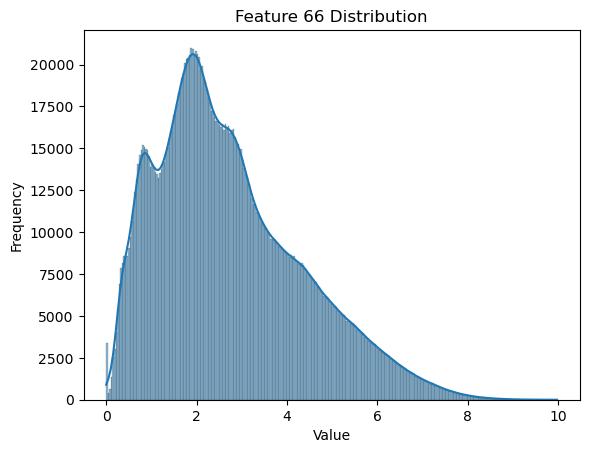

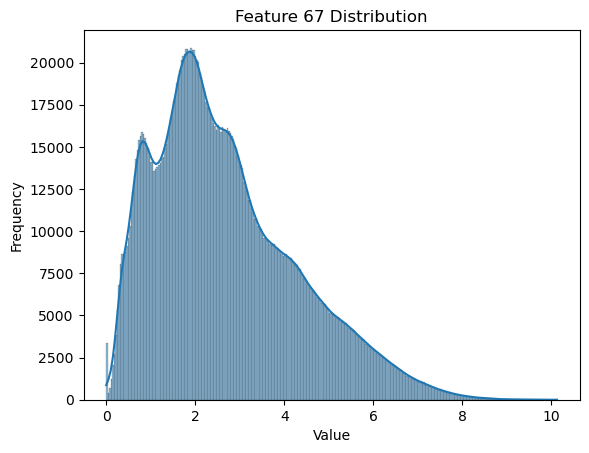

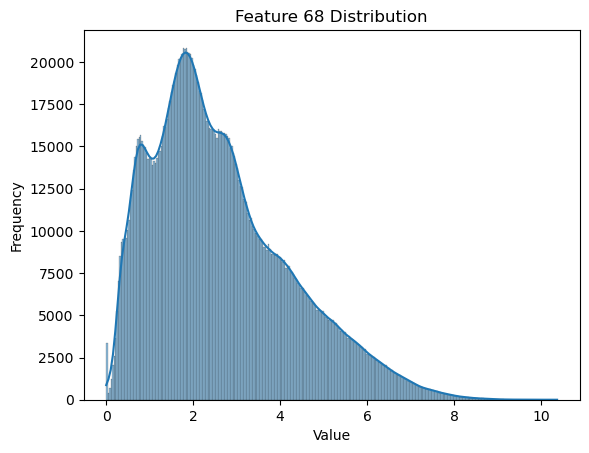

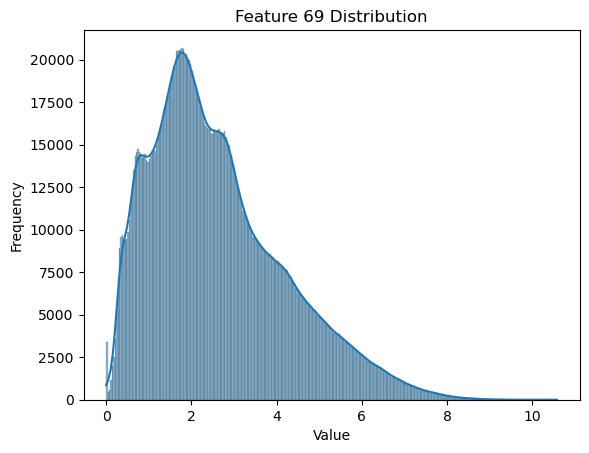

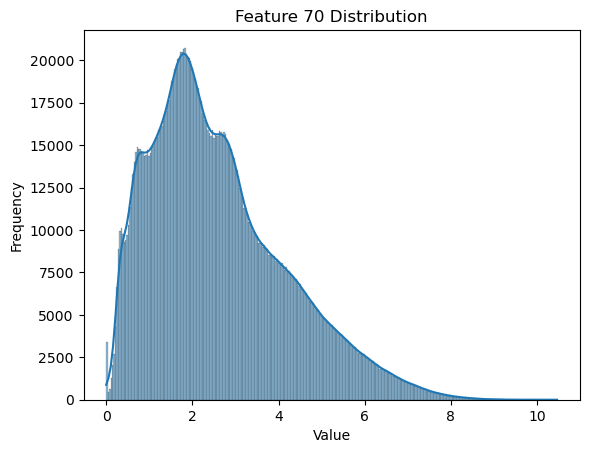

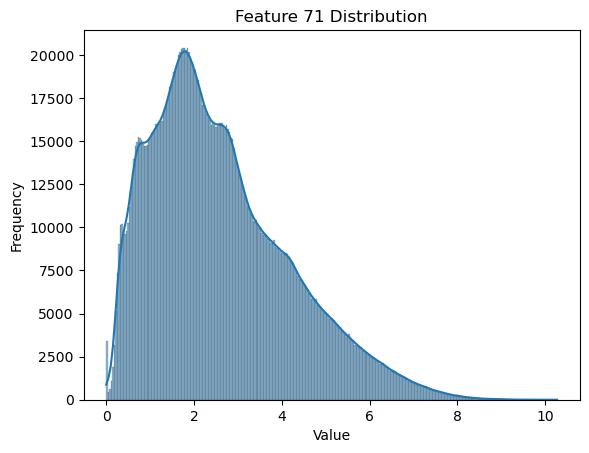

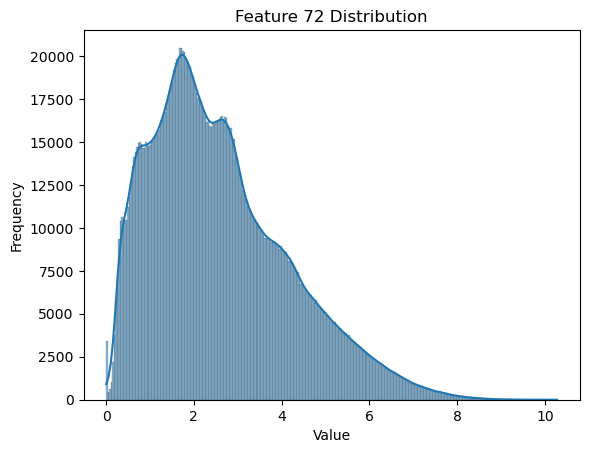

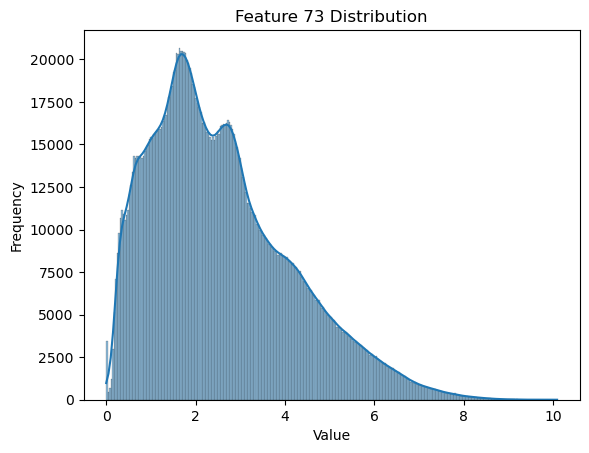

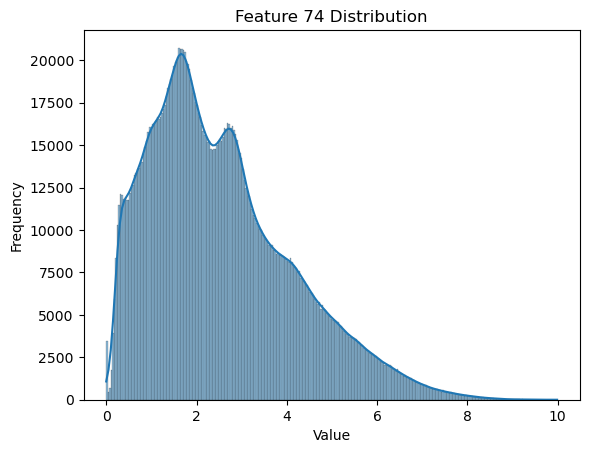

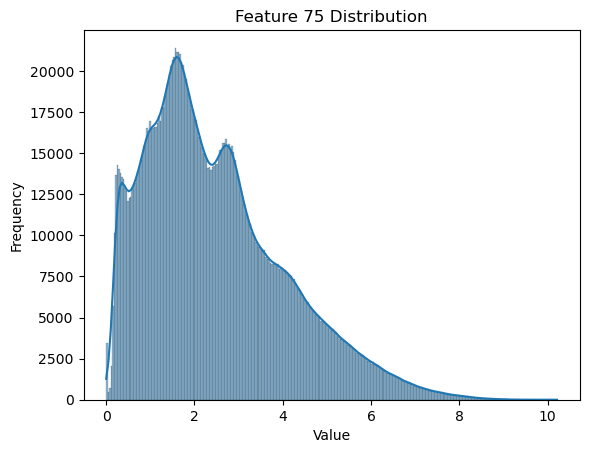

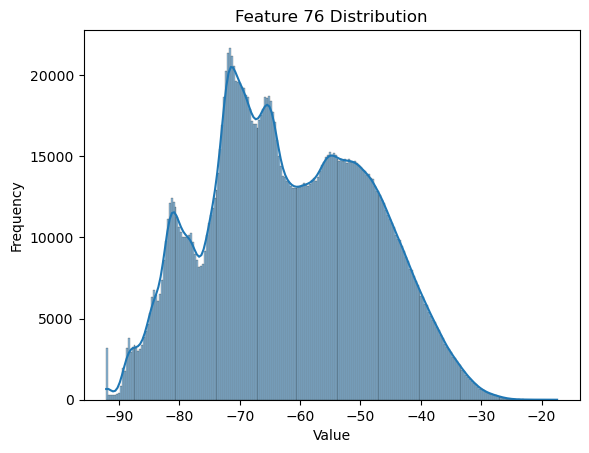

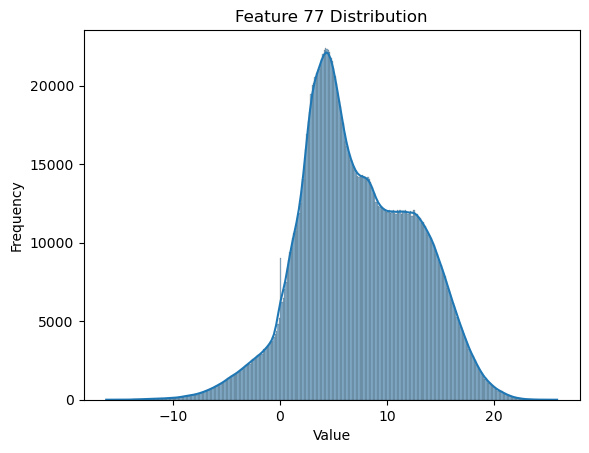

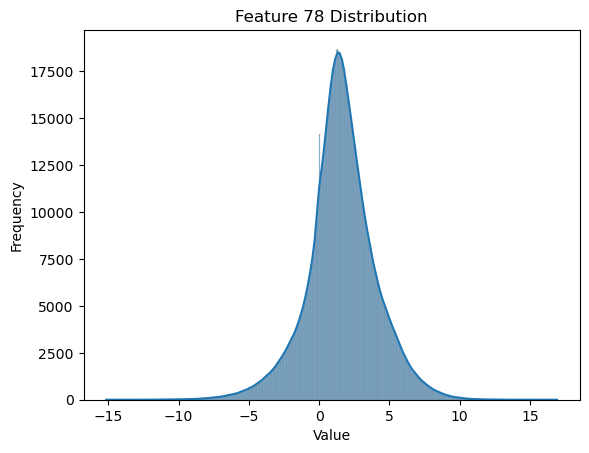

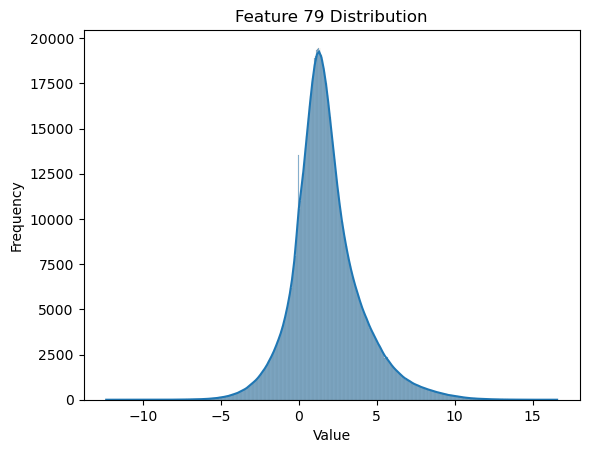

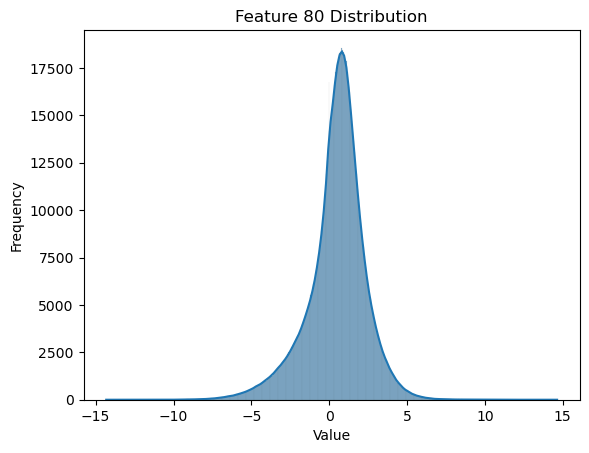

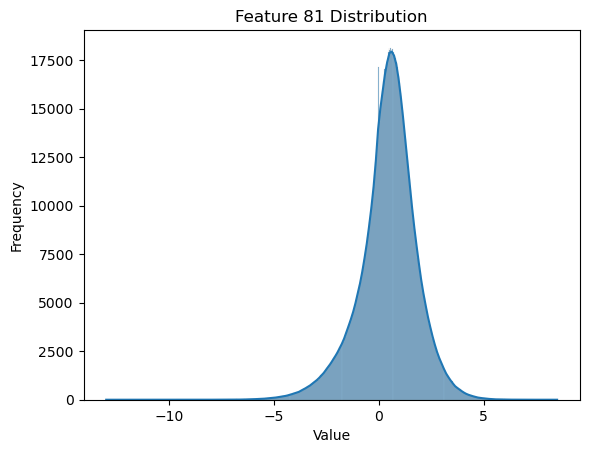

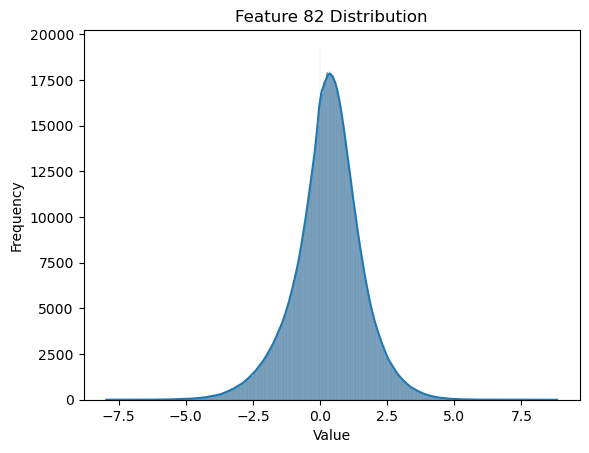

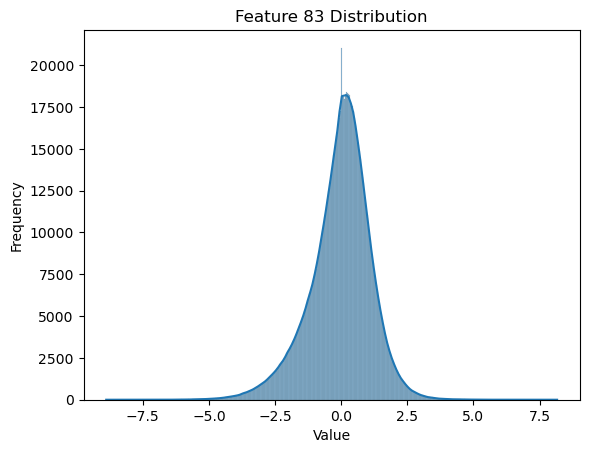

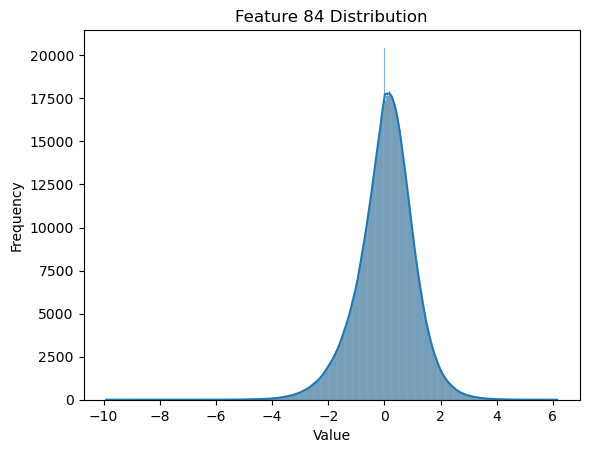

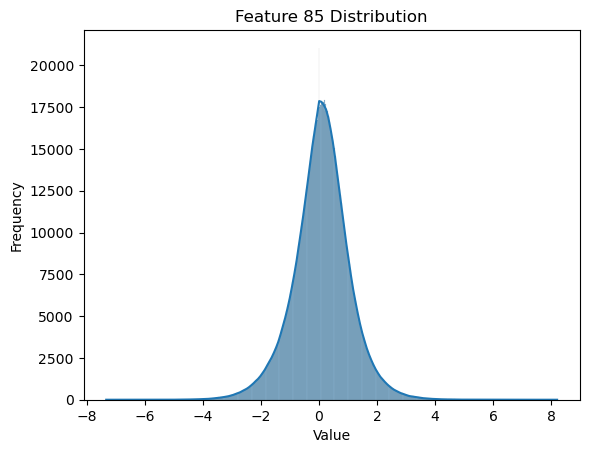

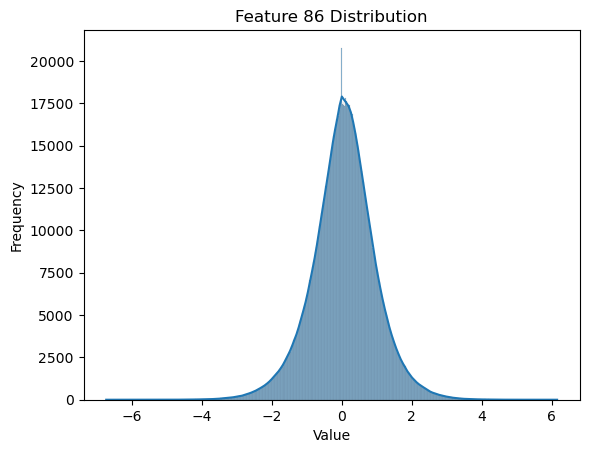

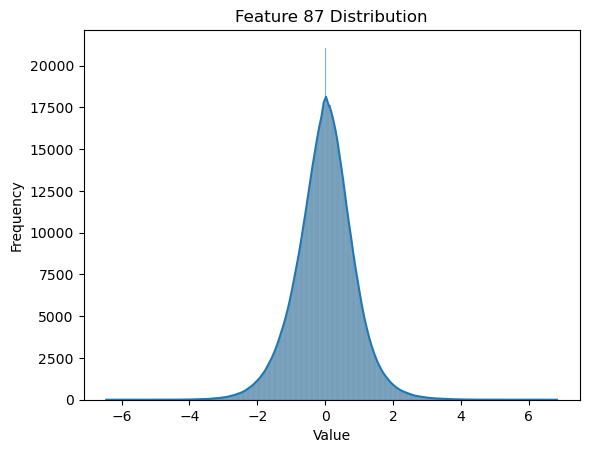

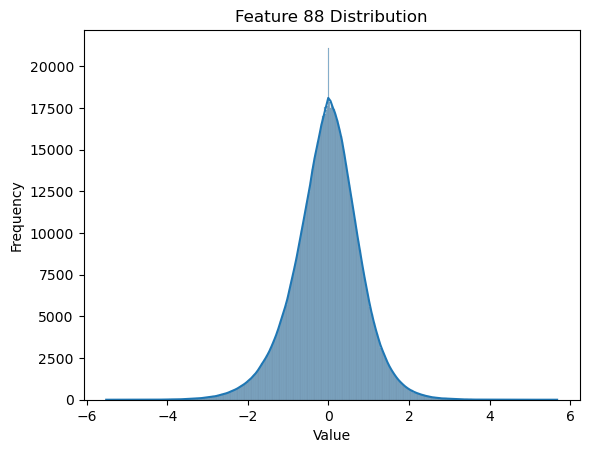

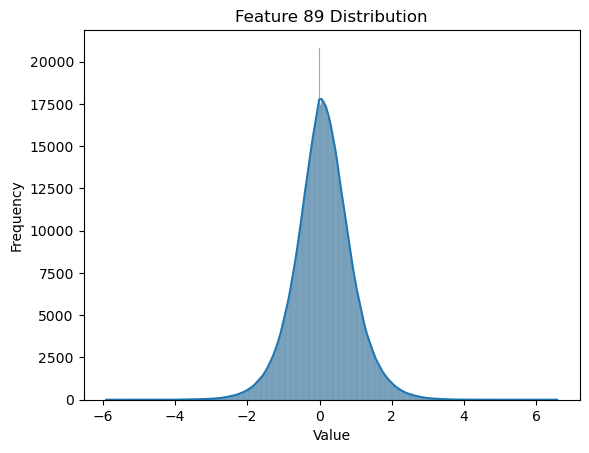

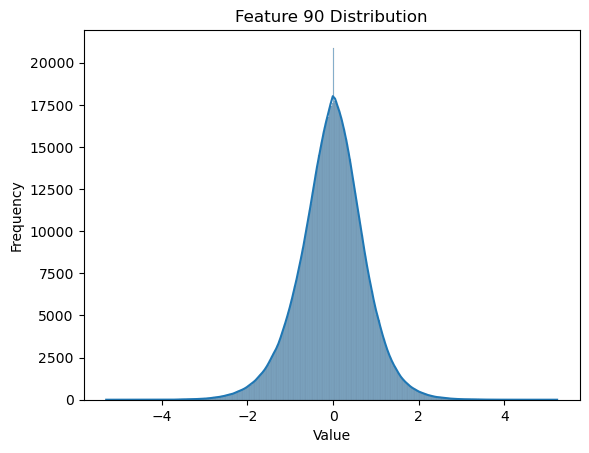

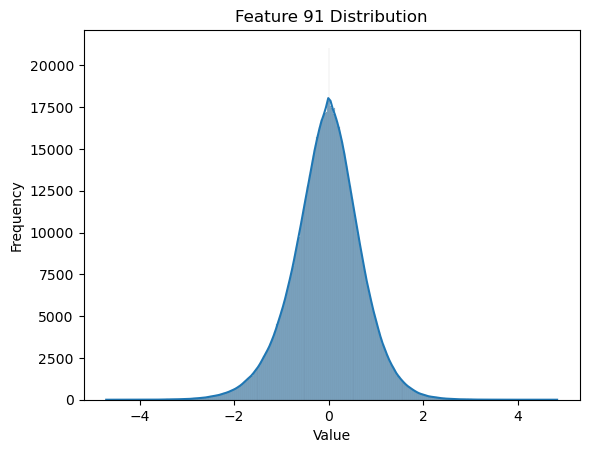

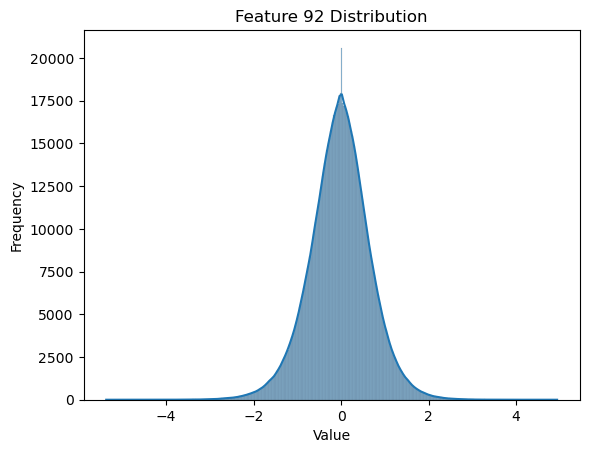

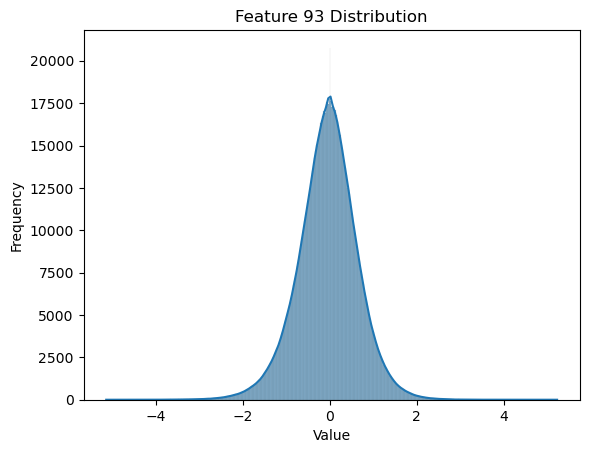

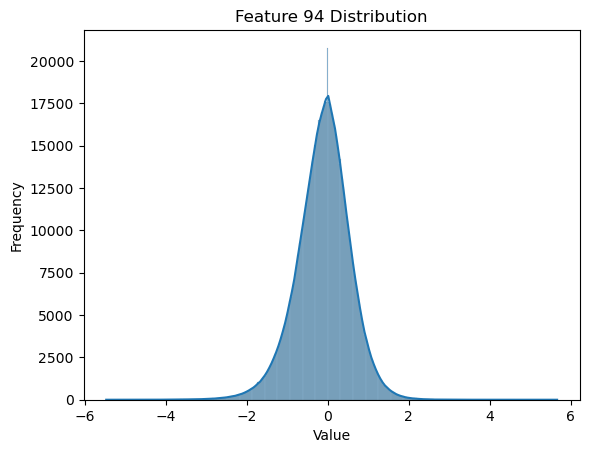

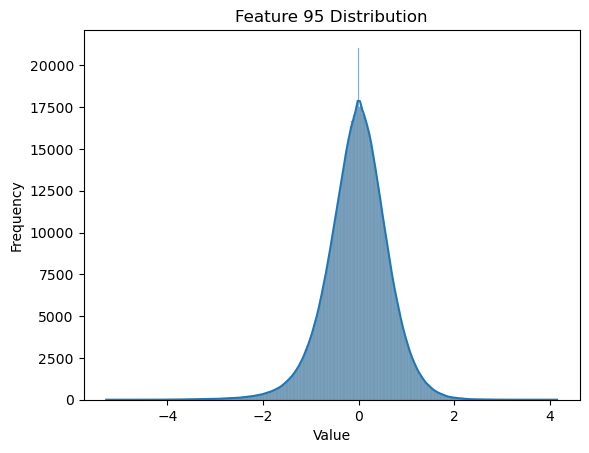

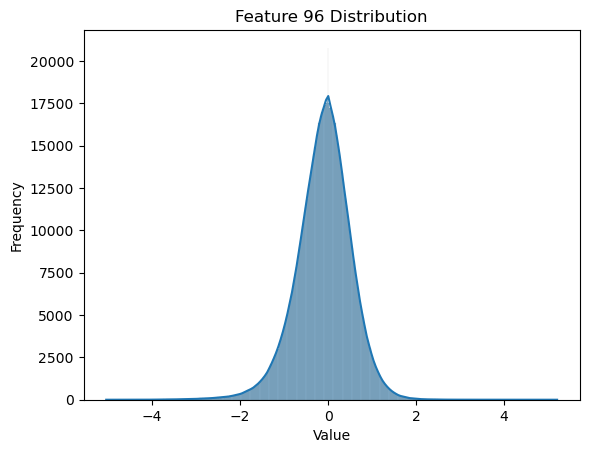

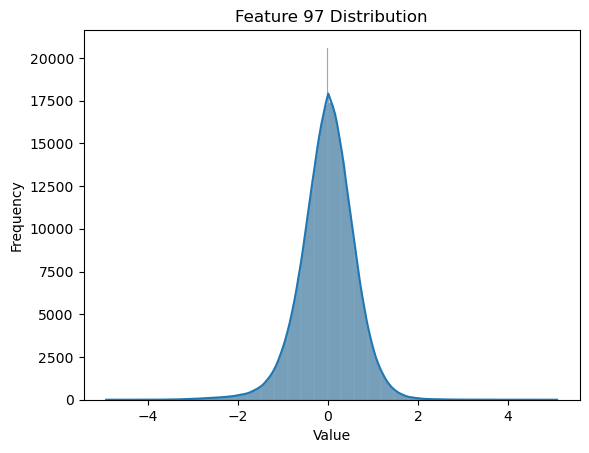

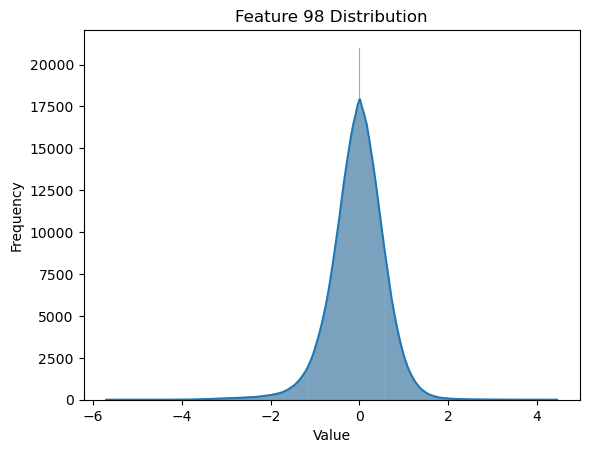

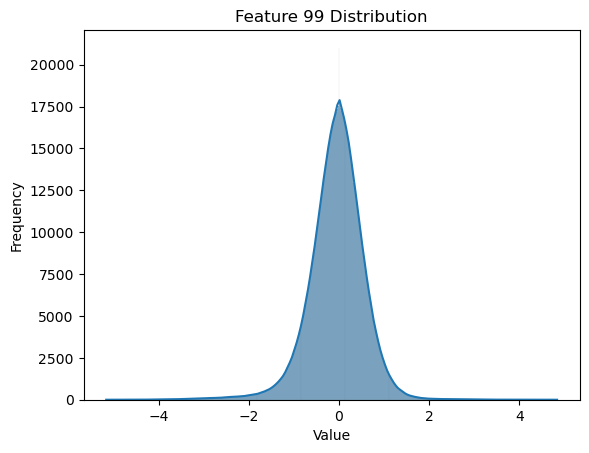

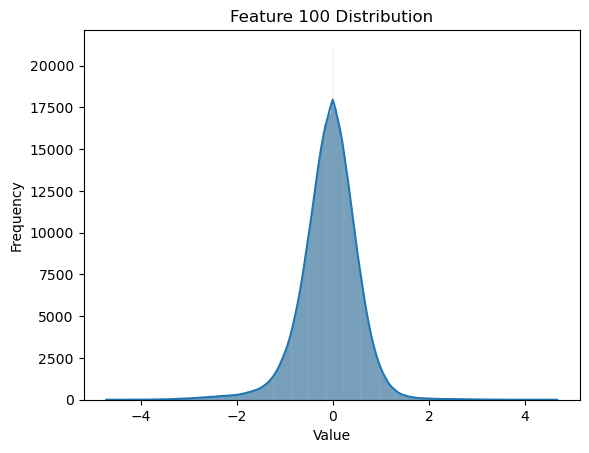

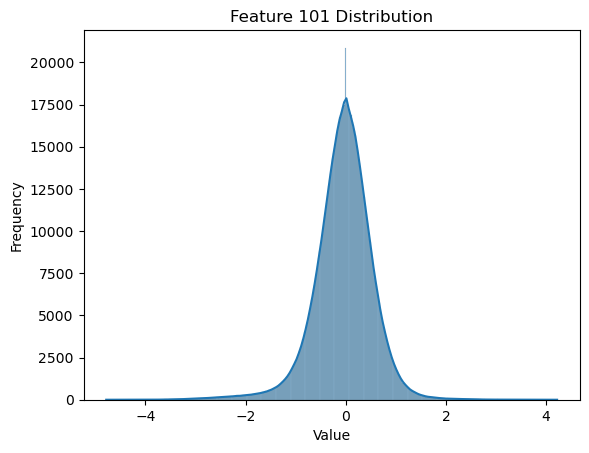

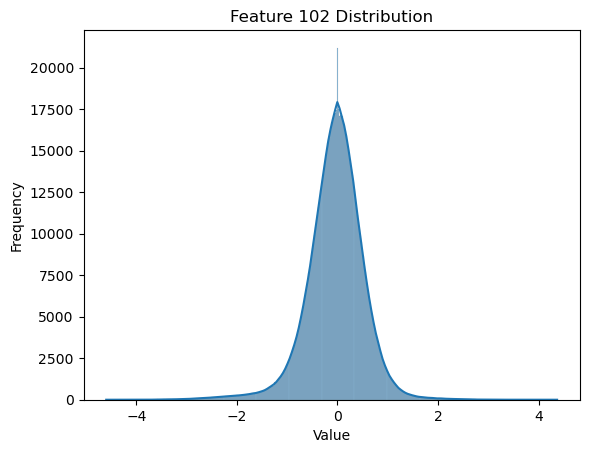

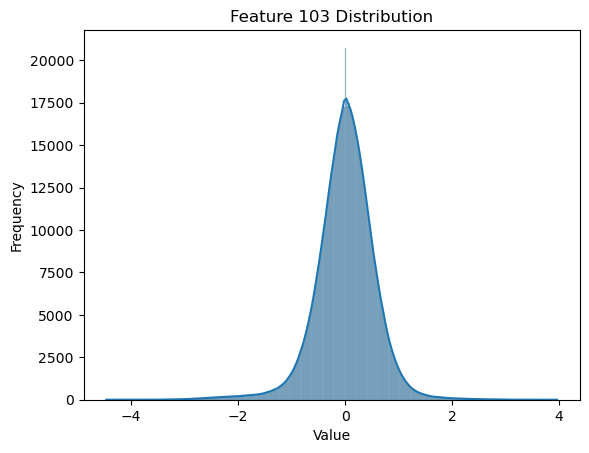

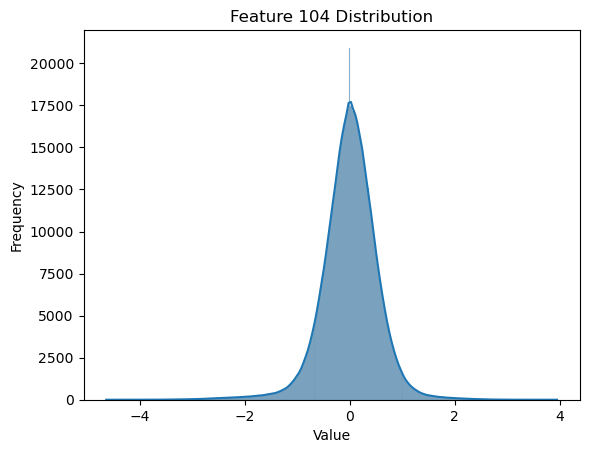

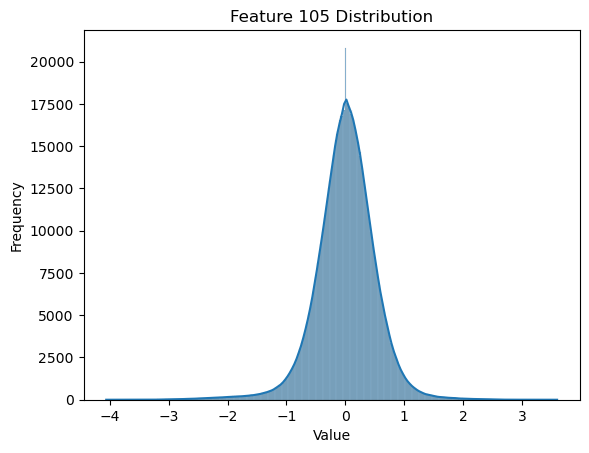

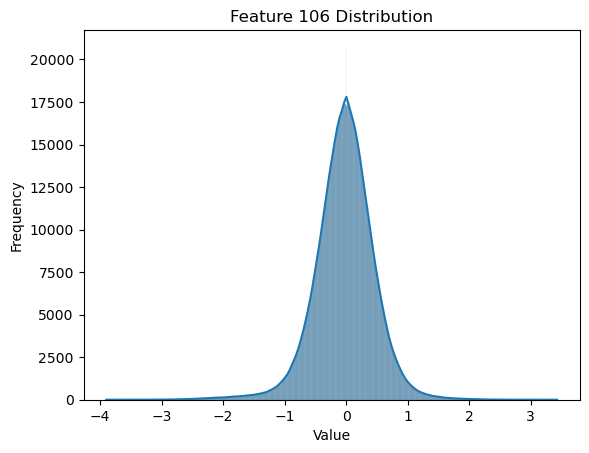

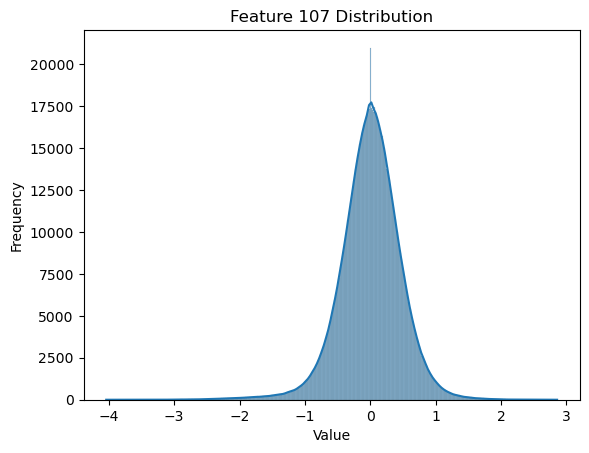

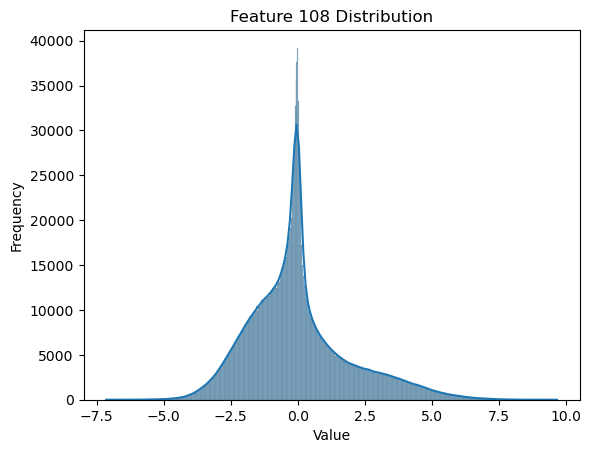

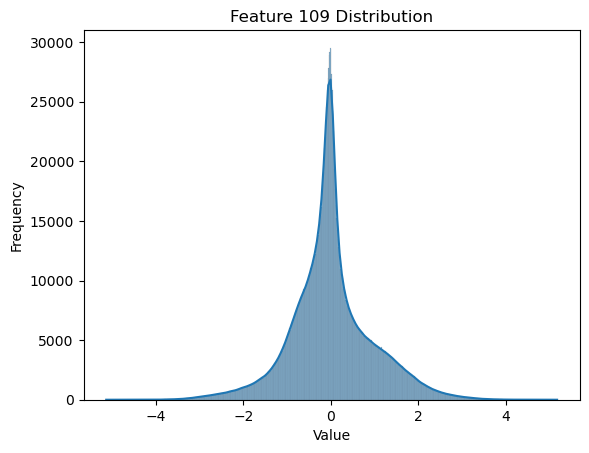

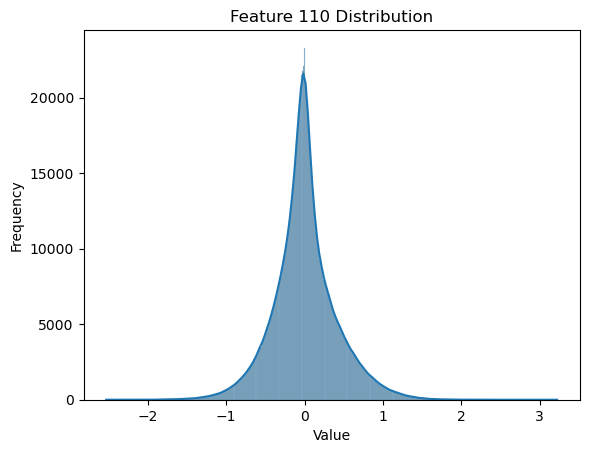

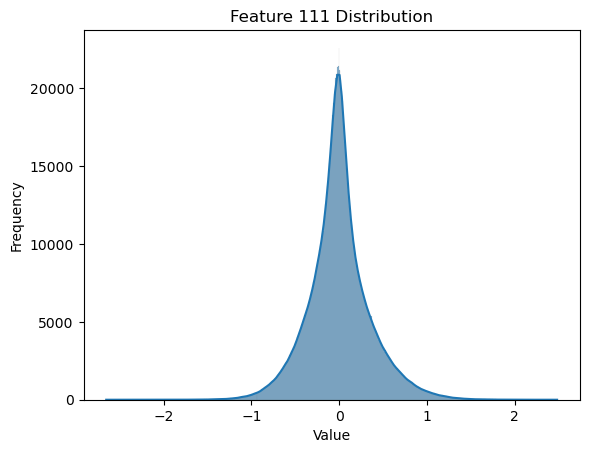

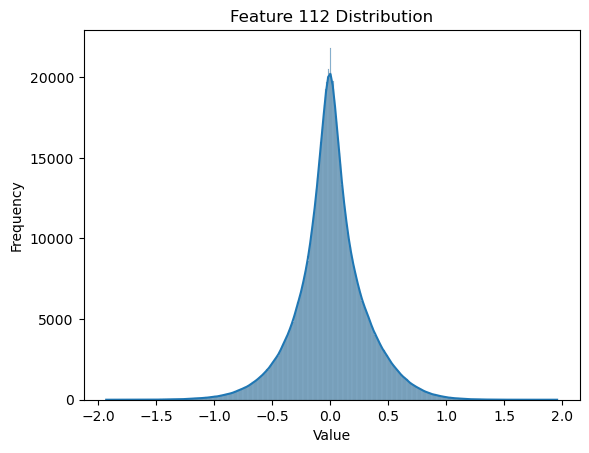

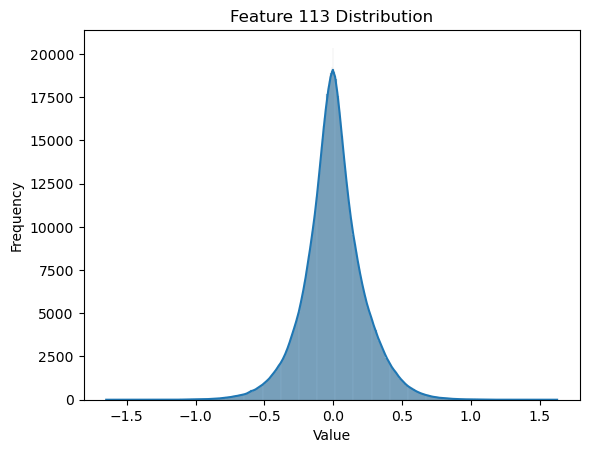

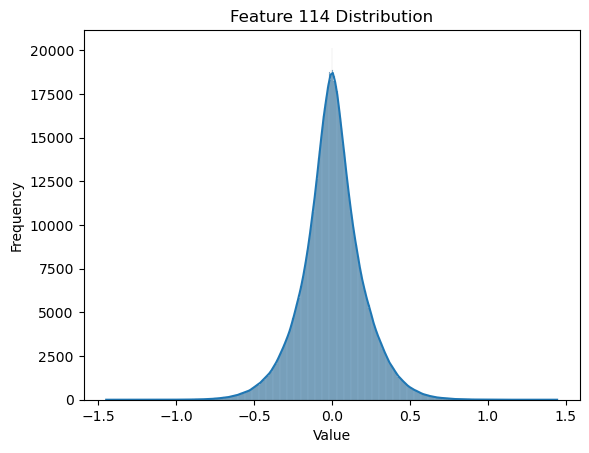

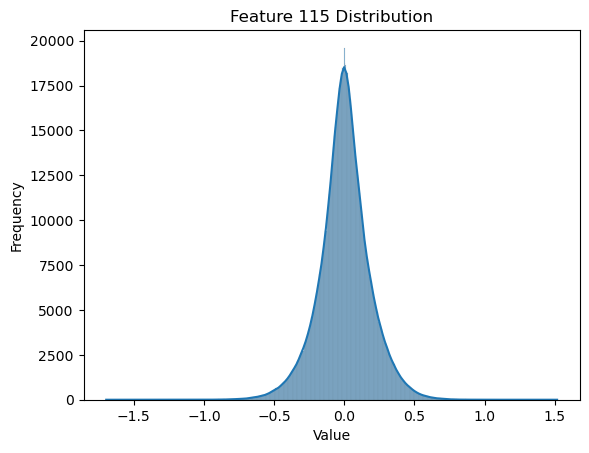

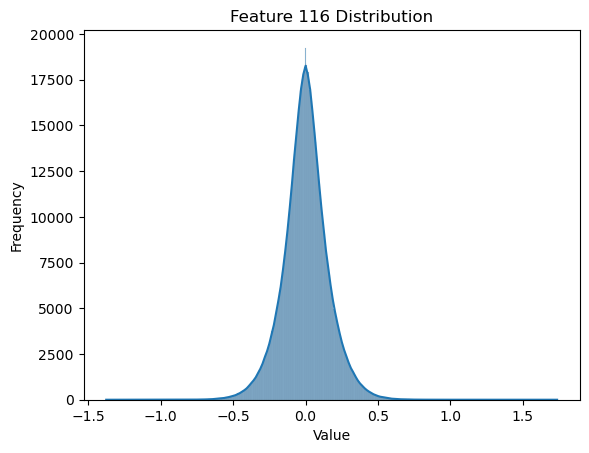

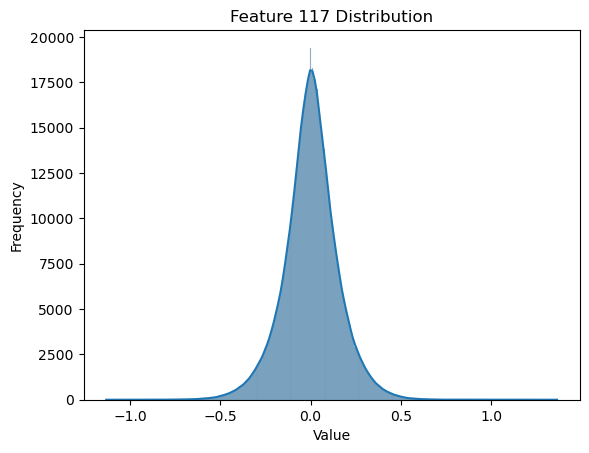

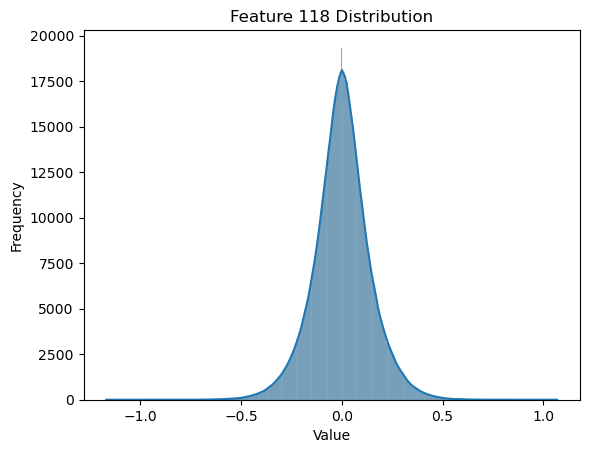

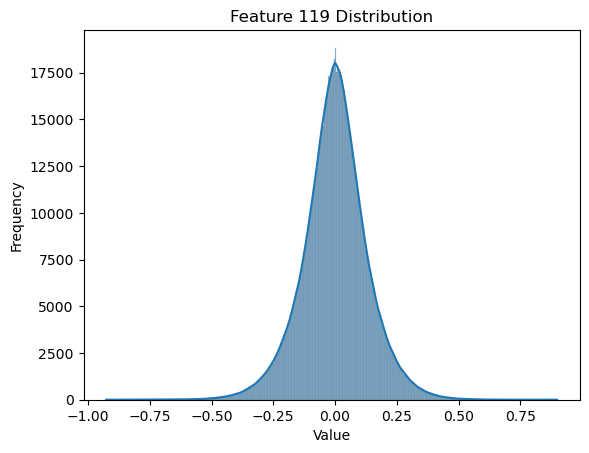

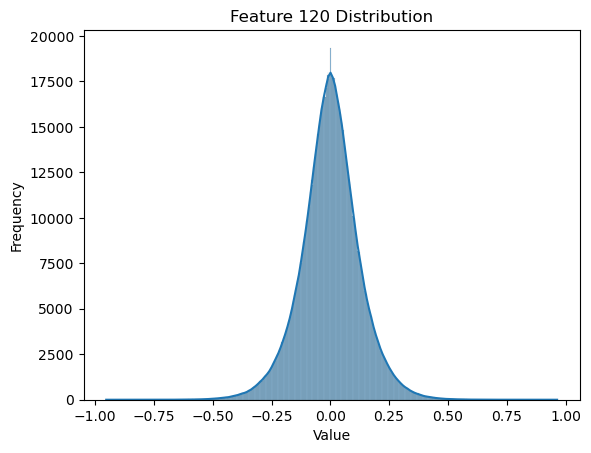

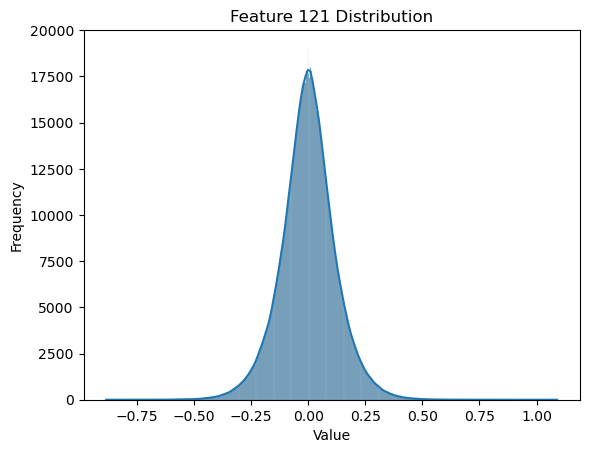

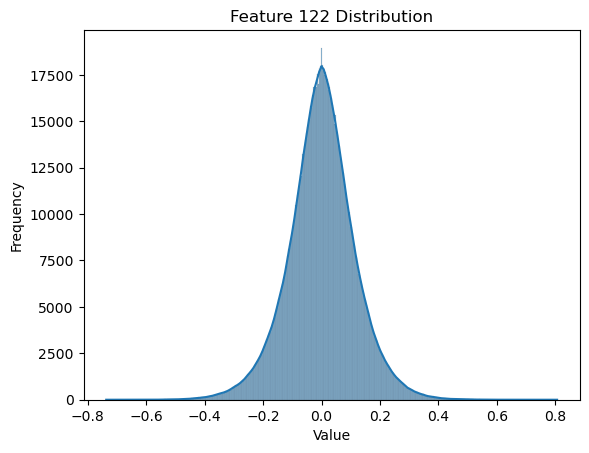

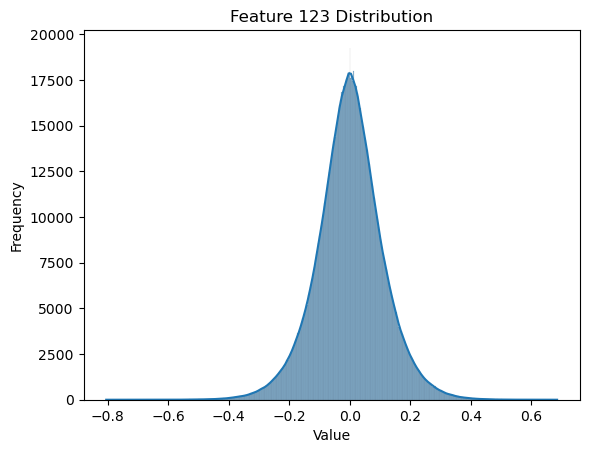

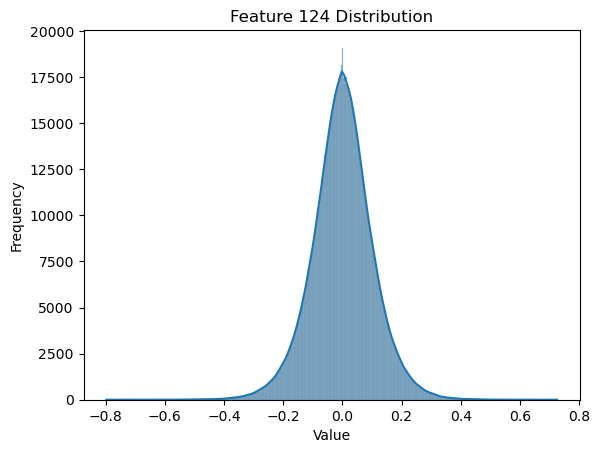

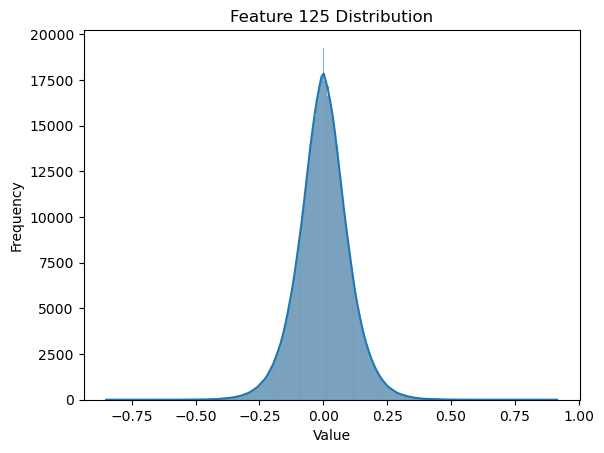

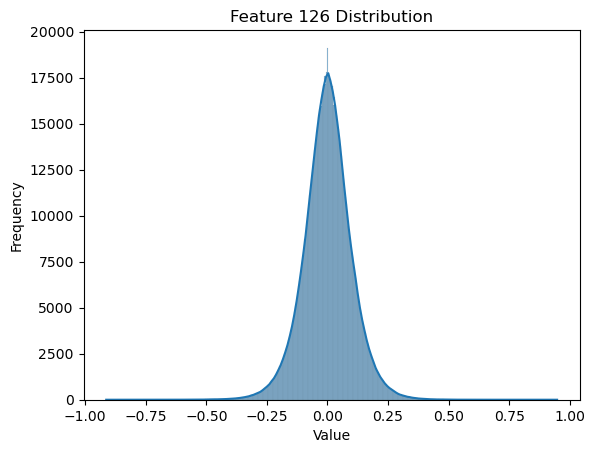

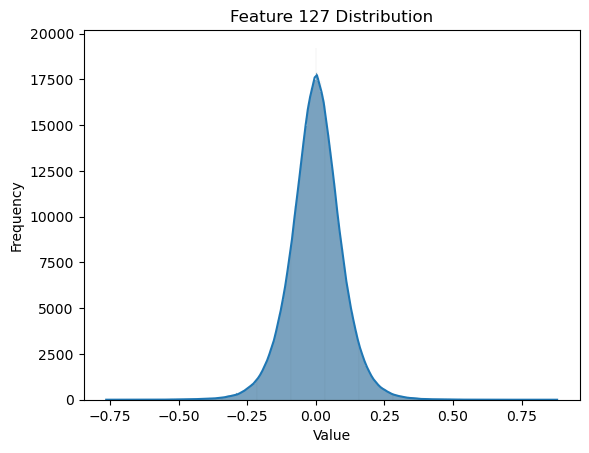

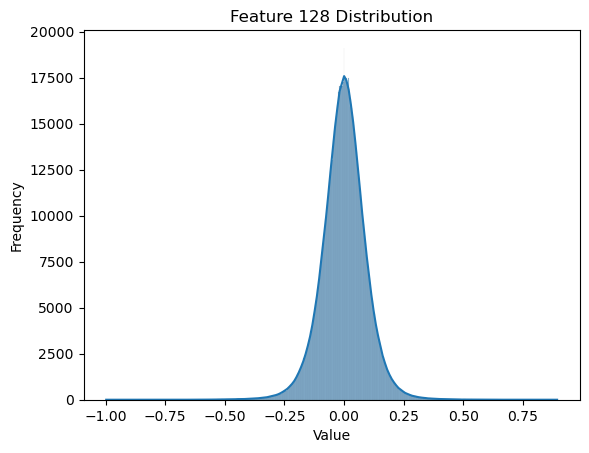

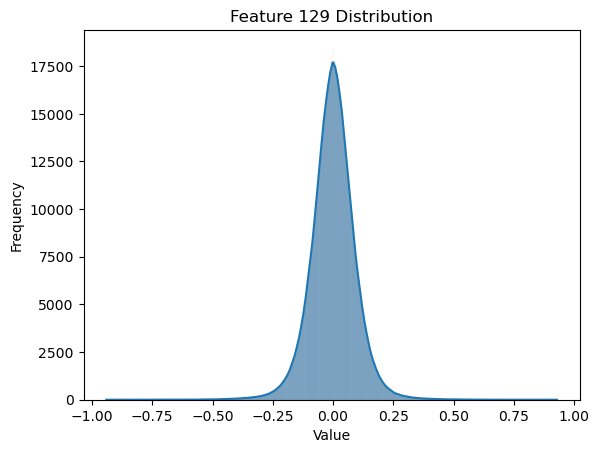

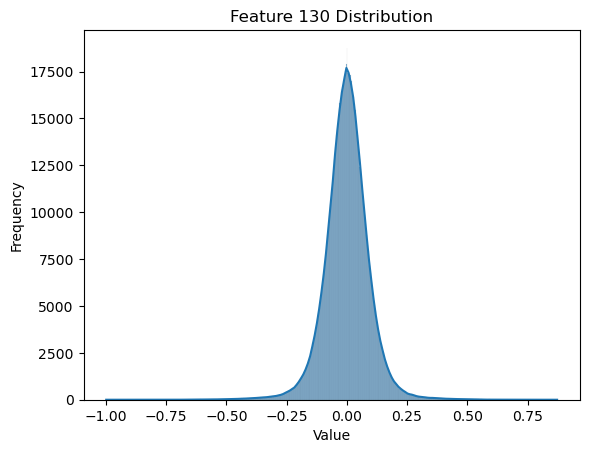

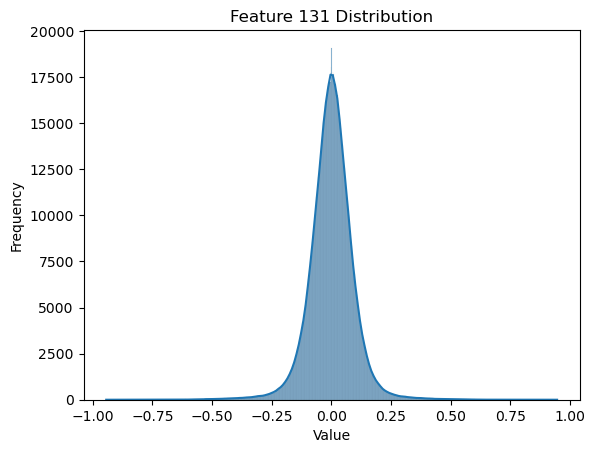

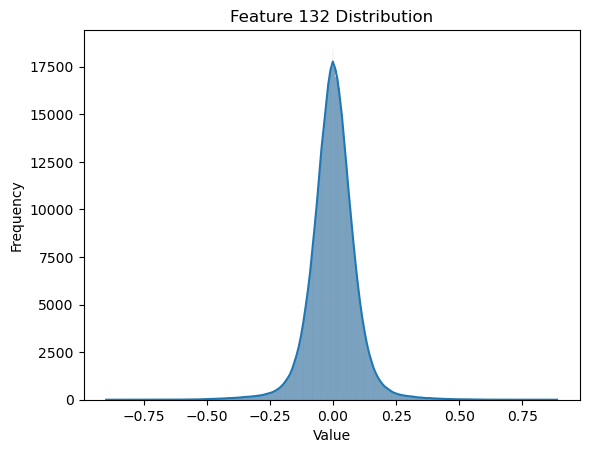

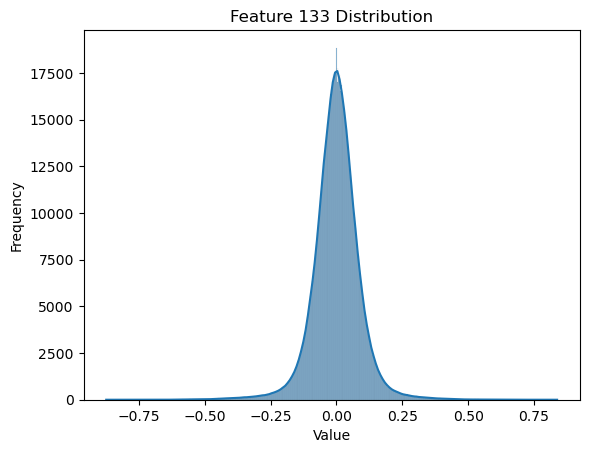

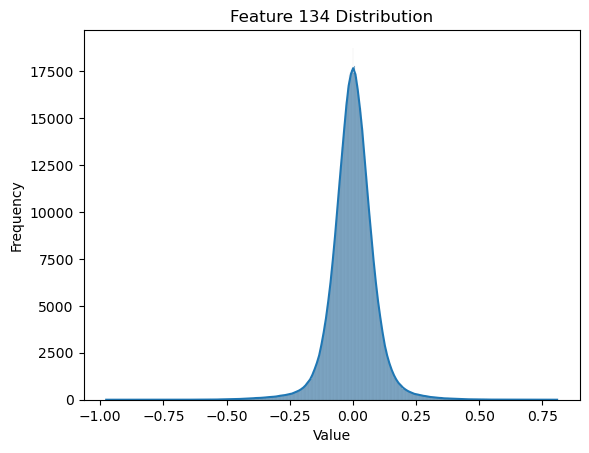

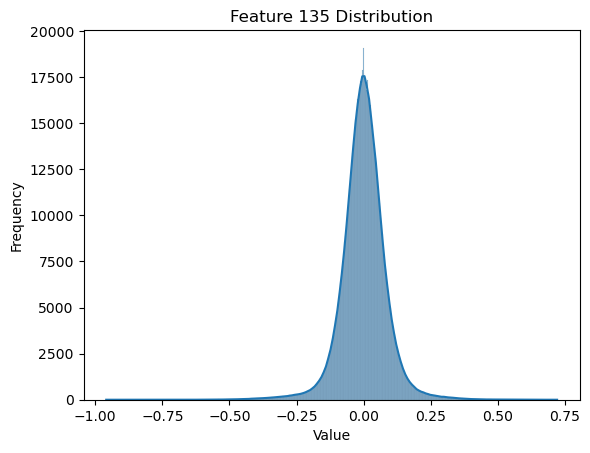

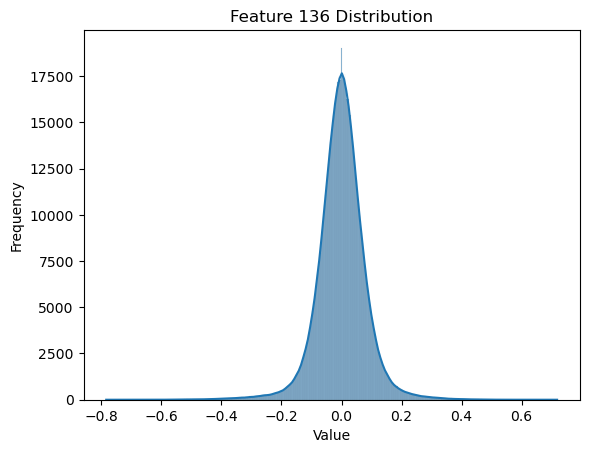

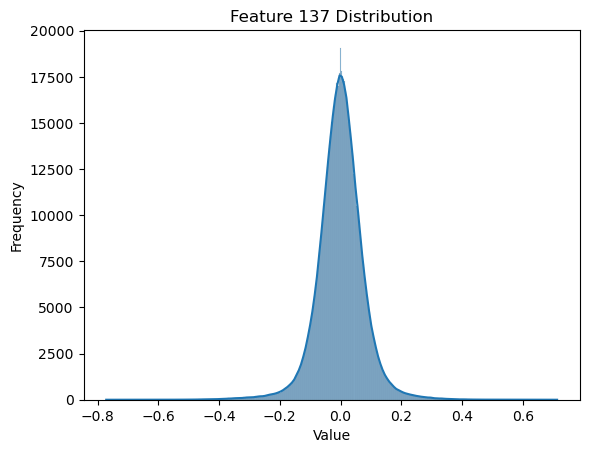

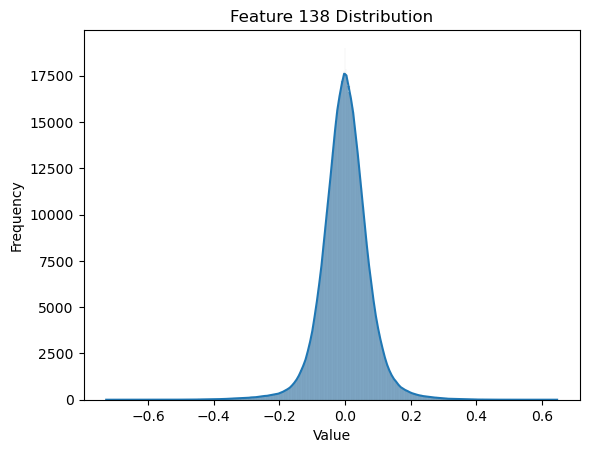

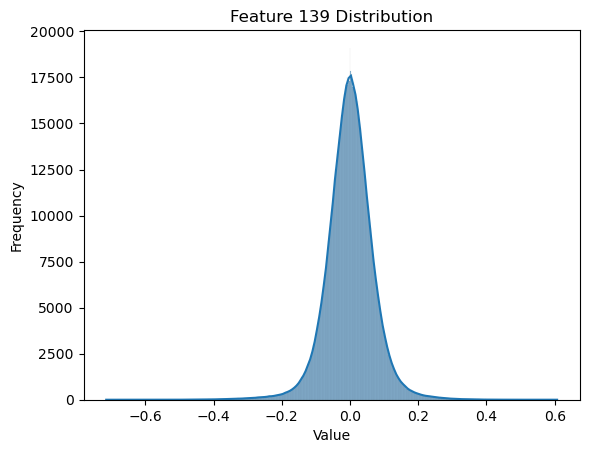

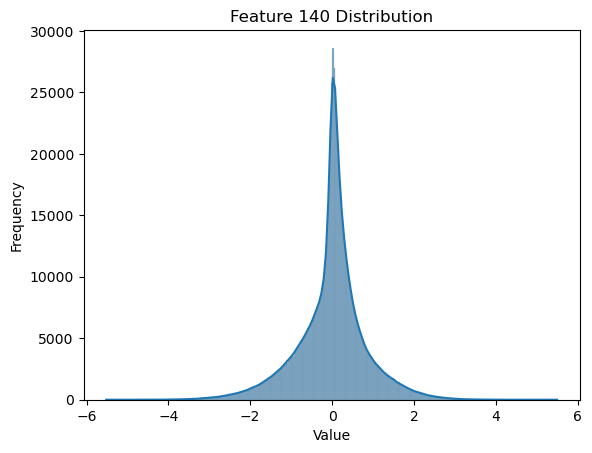

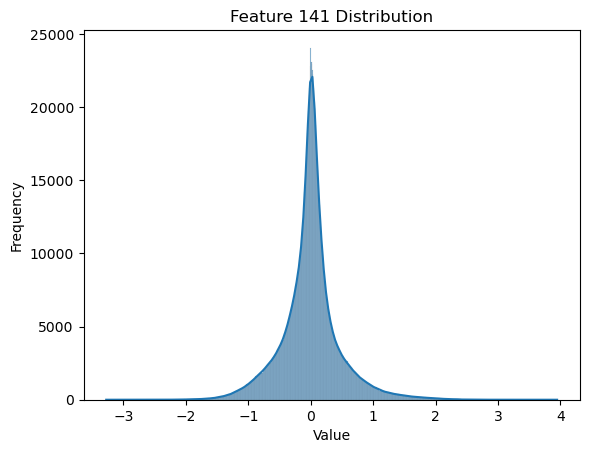

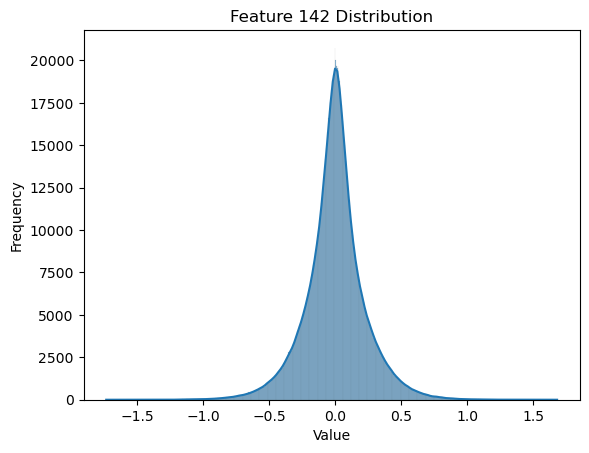

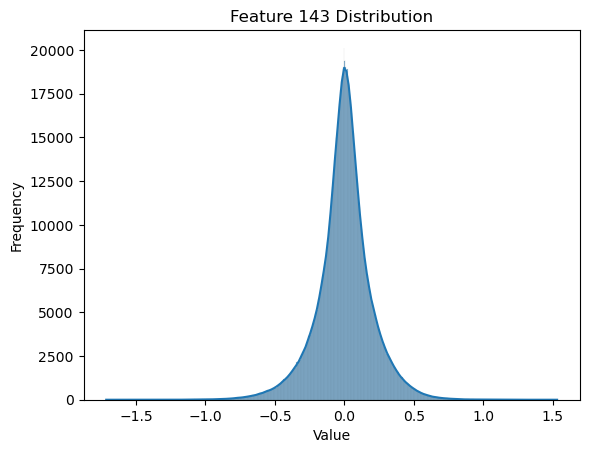

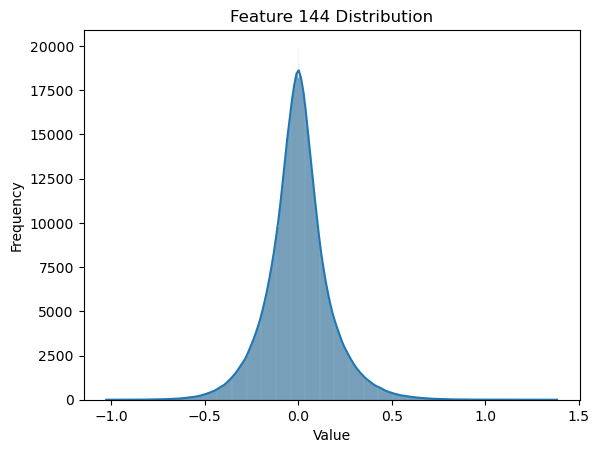

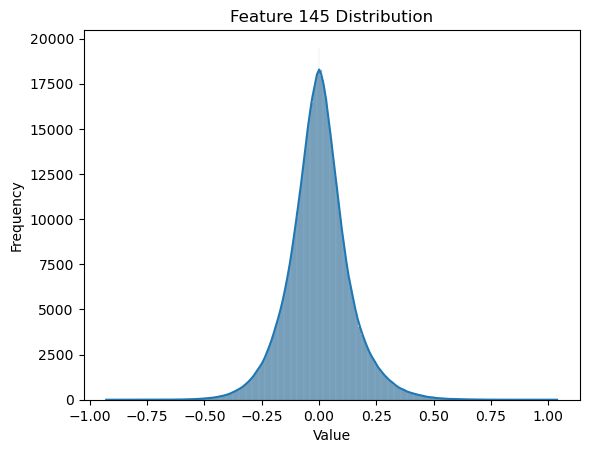

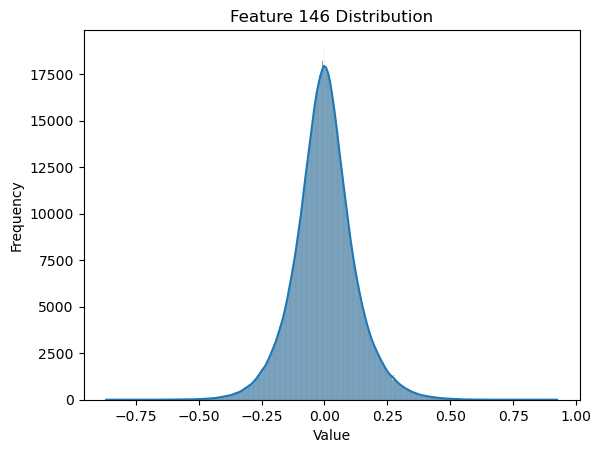

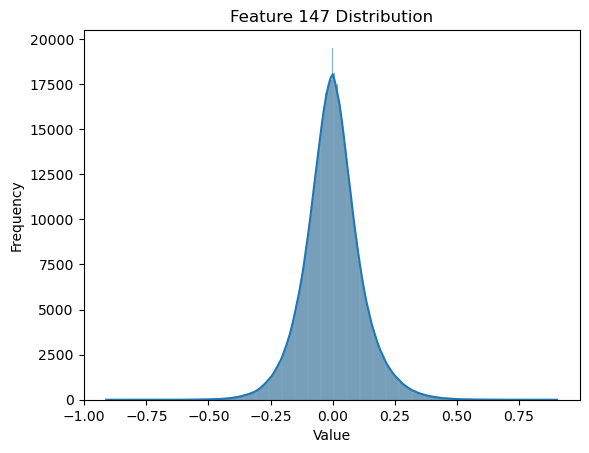

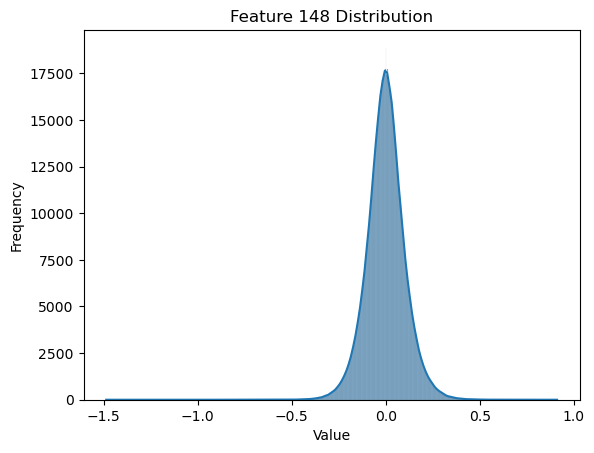

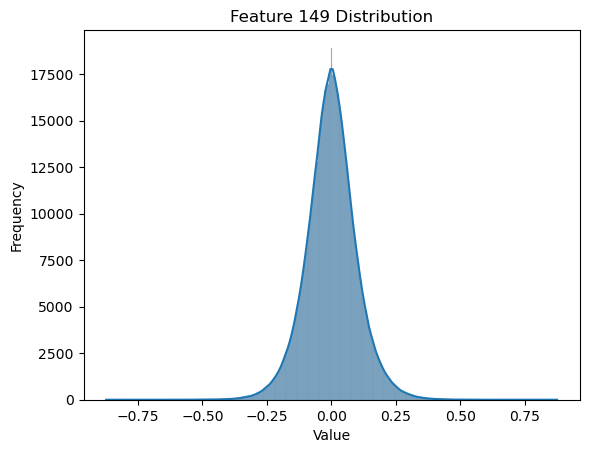

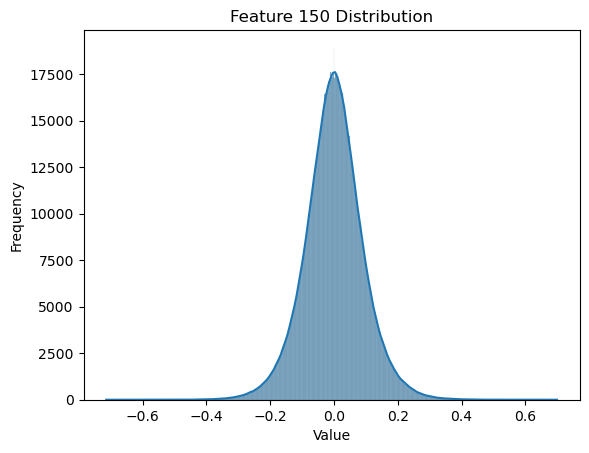

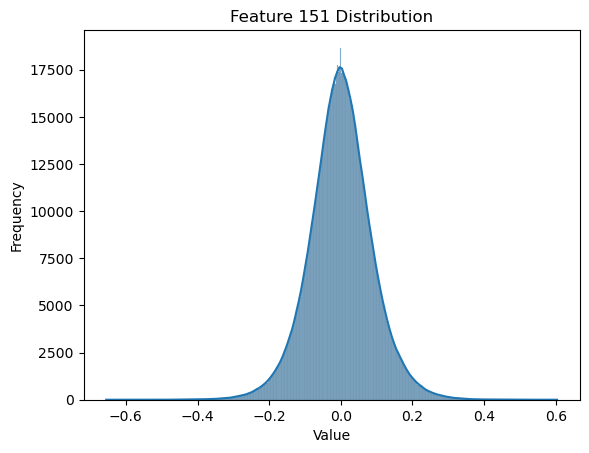

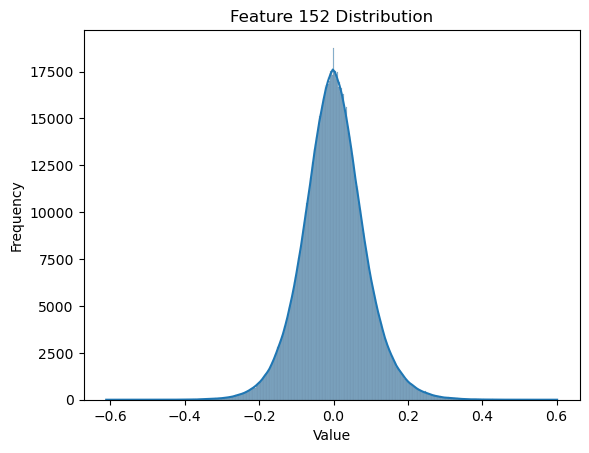

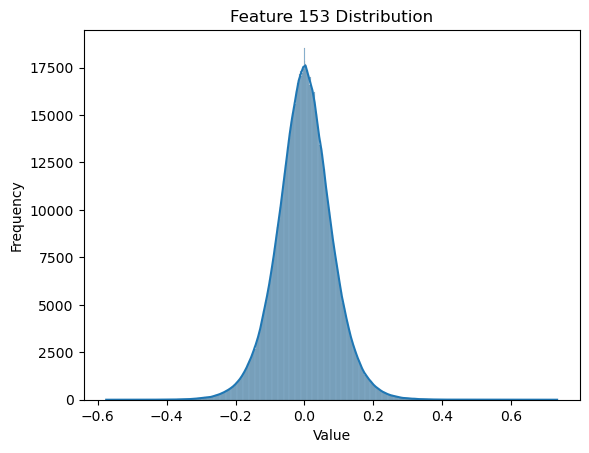

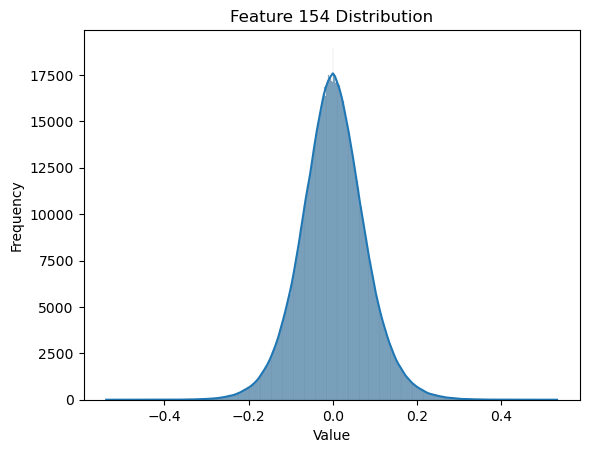

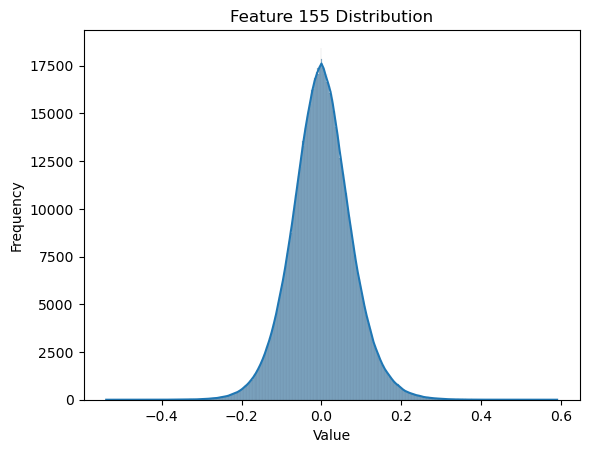

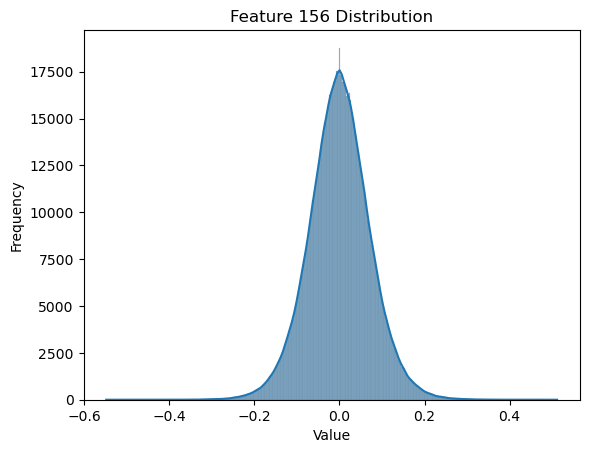

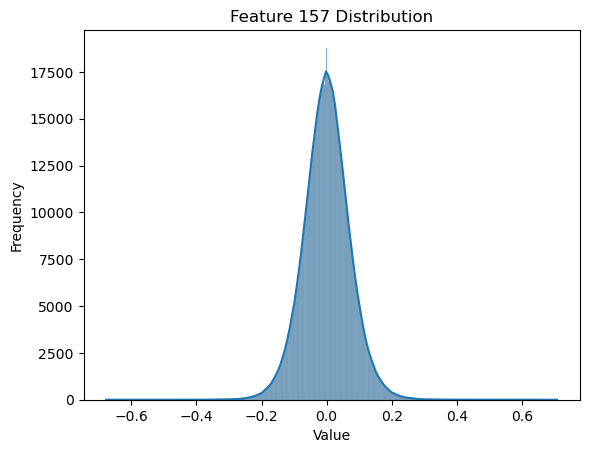

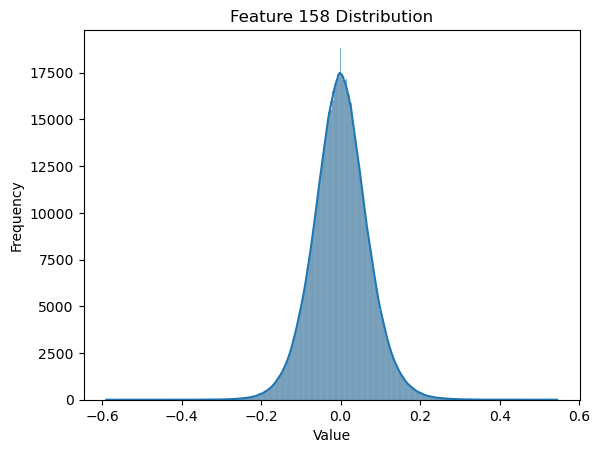

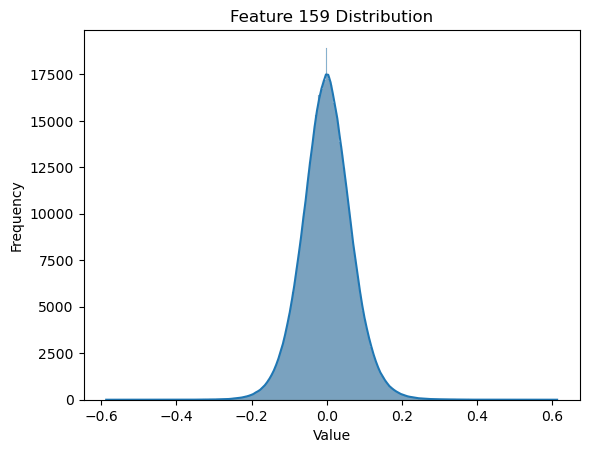

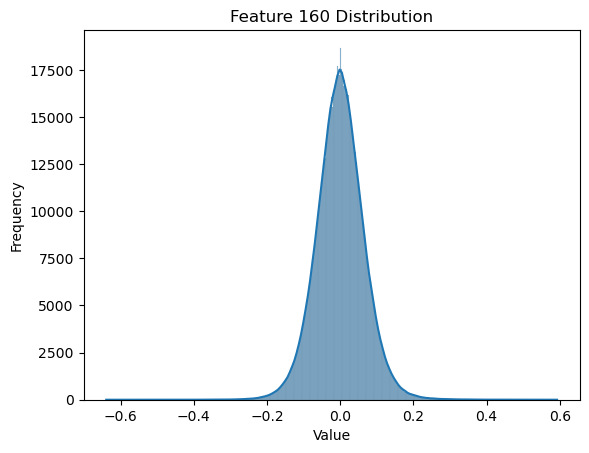

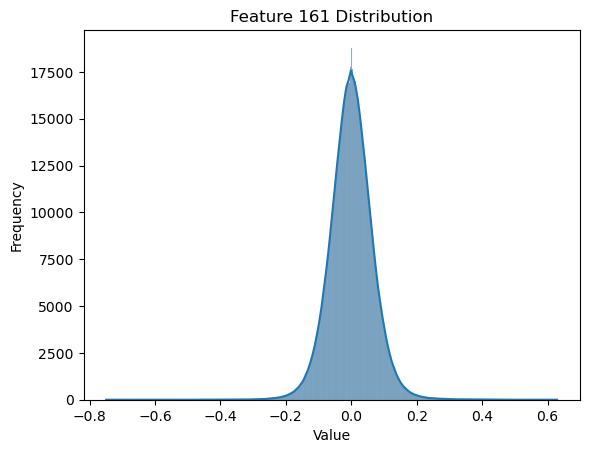

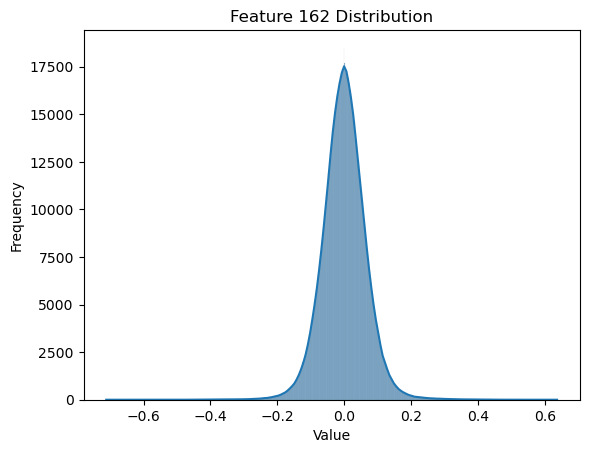

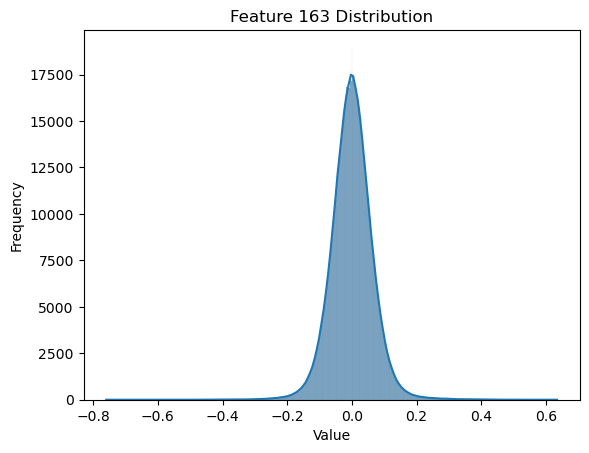

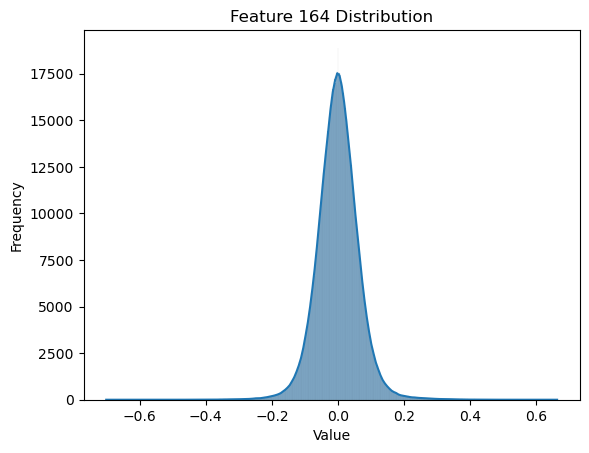

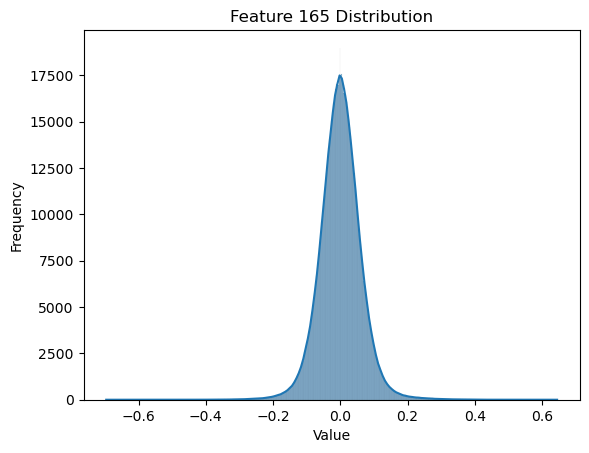

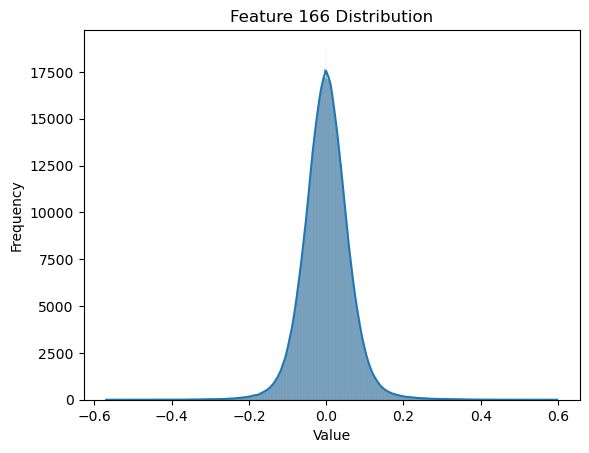

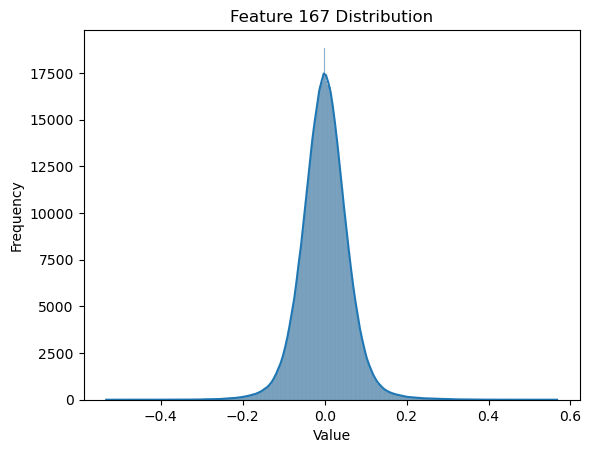

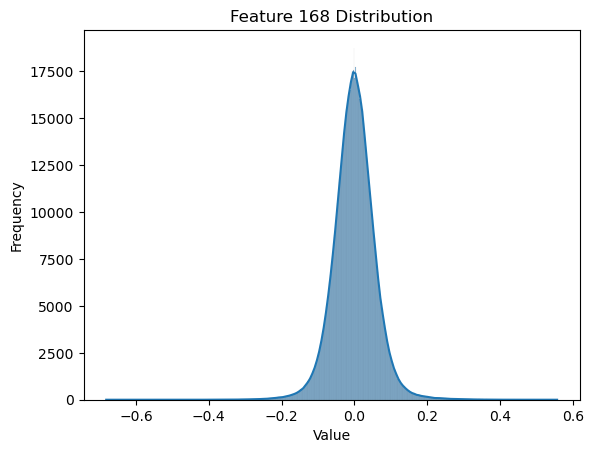

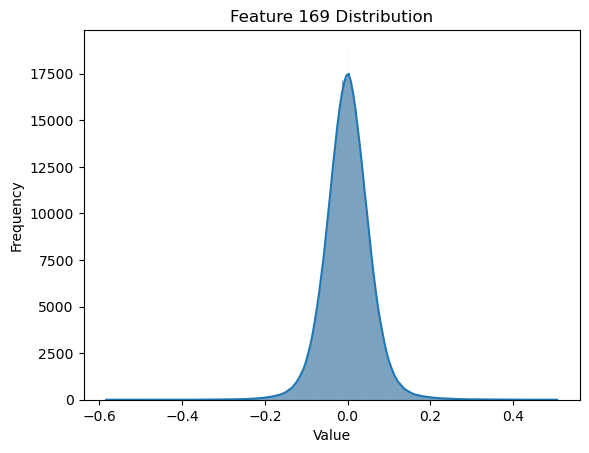

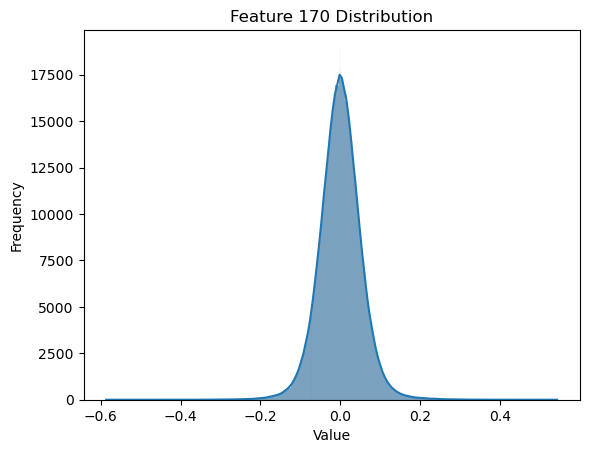

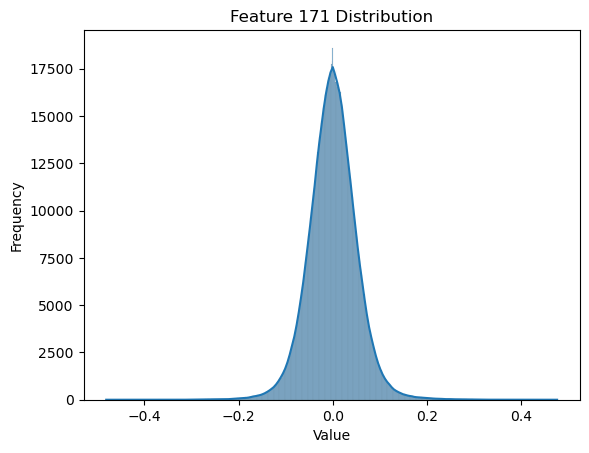

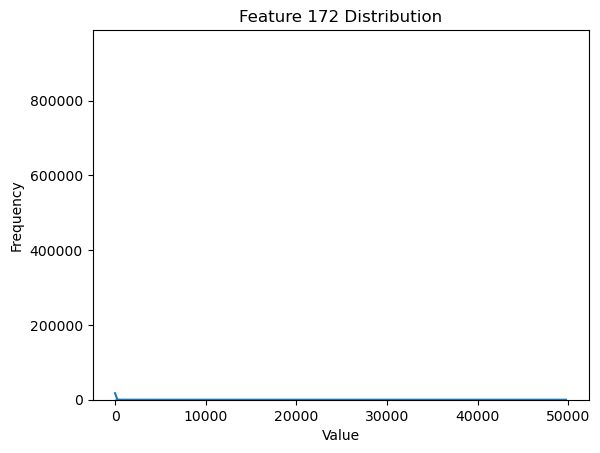

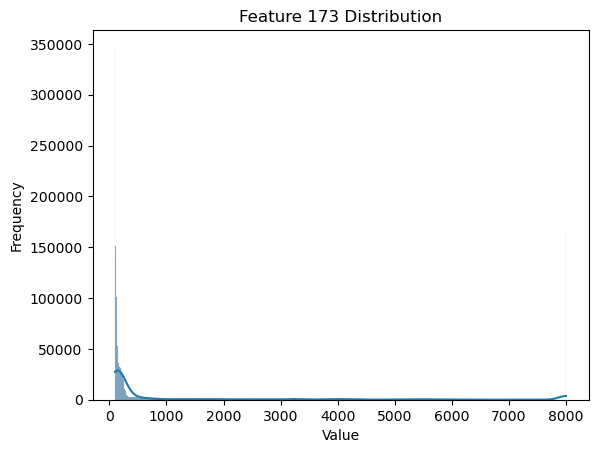

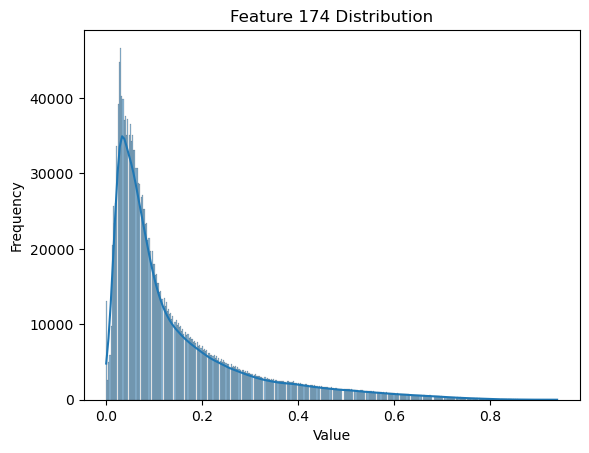

In [ ]:

# for feature in range(np.shape(timestamp_dataset)[1]):
#     sns.histplot(df[feature], kde=True)
#     plt.title(f'Feature {feature} Distribution')
#     plt.xlabel('Value')
#     plt.ylabel('Frequency')
#     plt.show()

In [ ]:
np.shape(df)

(1993024, 176)